# Downloading S&P Stocks Data

🇺🇸 DOWNLOADING REAL S&P 500 STOCK DATA
🌐 Downloading fresh data from Yahoo Finance...
🔄 Downloading data for 30 S&P stocks...
📅 Date range: 2022-01-01 to 2025-05-31
⬇️  Downloading AAPL (1/30)...
✅ AAPL: 855 records
⬇️  Downloading MSFT (2/30)...
✅ MSFT: 855 records
⬇️  Downloading GOOGL (3/30)...
✅ GOOGL: 855 records
⬇️  Downloading AMZN (4/30)...
✅ AMZN: 855 records
⬇️  Downloading NVDA (5/30)...
✅ NVDA: 855 records
⬇️  Downloading META (6/30)...
✅ META: 855 records
⬇️  Downloading TSLA (7/30)...
✅ TSLA: 855 records
⬇️  Downloading BRK-B (8/30)...
✅ BRK-B: 855 records
⬇️  Downloading AVGO (9/30)...
✅ AVGO: 855 records
⬇️  Downloading JPM (10/30)...
✅ JPM: 855 records
⬇️  Downloading LLY (11/30)...
✅ LLY: 855 records
⬇️  Downloading V (12/30)...
✅ V: 855 records
⬇️  Downloading UNH (13/30)...
✅ UNH: 855 records
⬇️  Downloading XOM (14/30)...
✅ XOM: 855 records
⬇️  Downloading MA (15/30)...
✅ MA: 855 records
⬇️  Downloading PG (16/30)...
✅ PG: 855 records
⬇️  Downloading JNJ (17/30)...

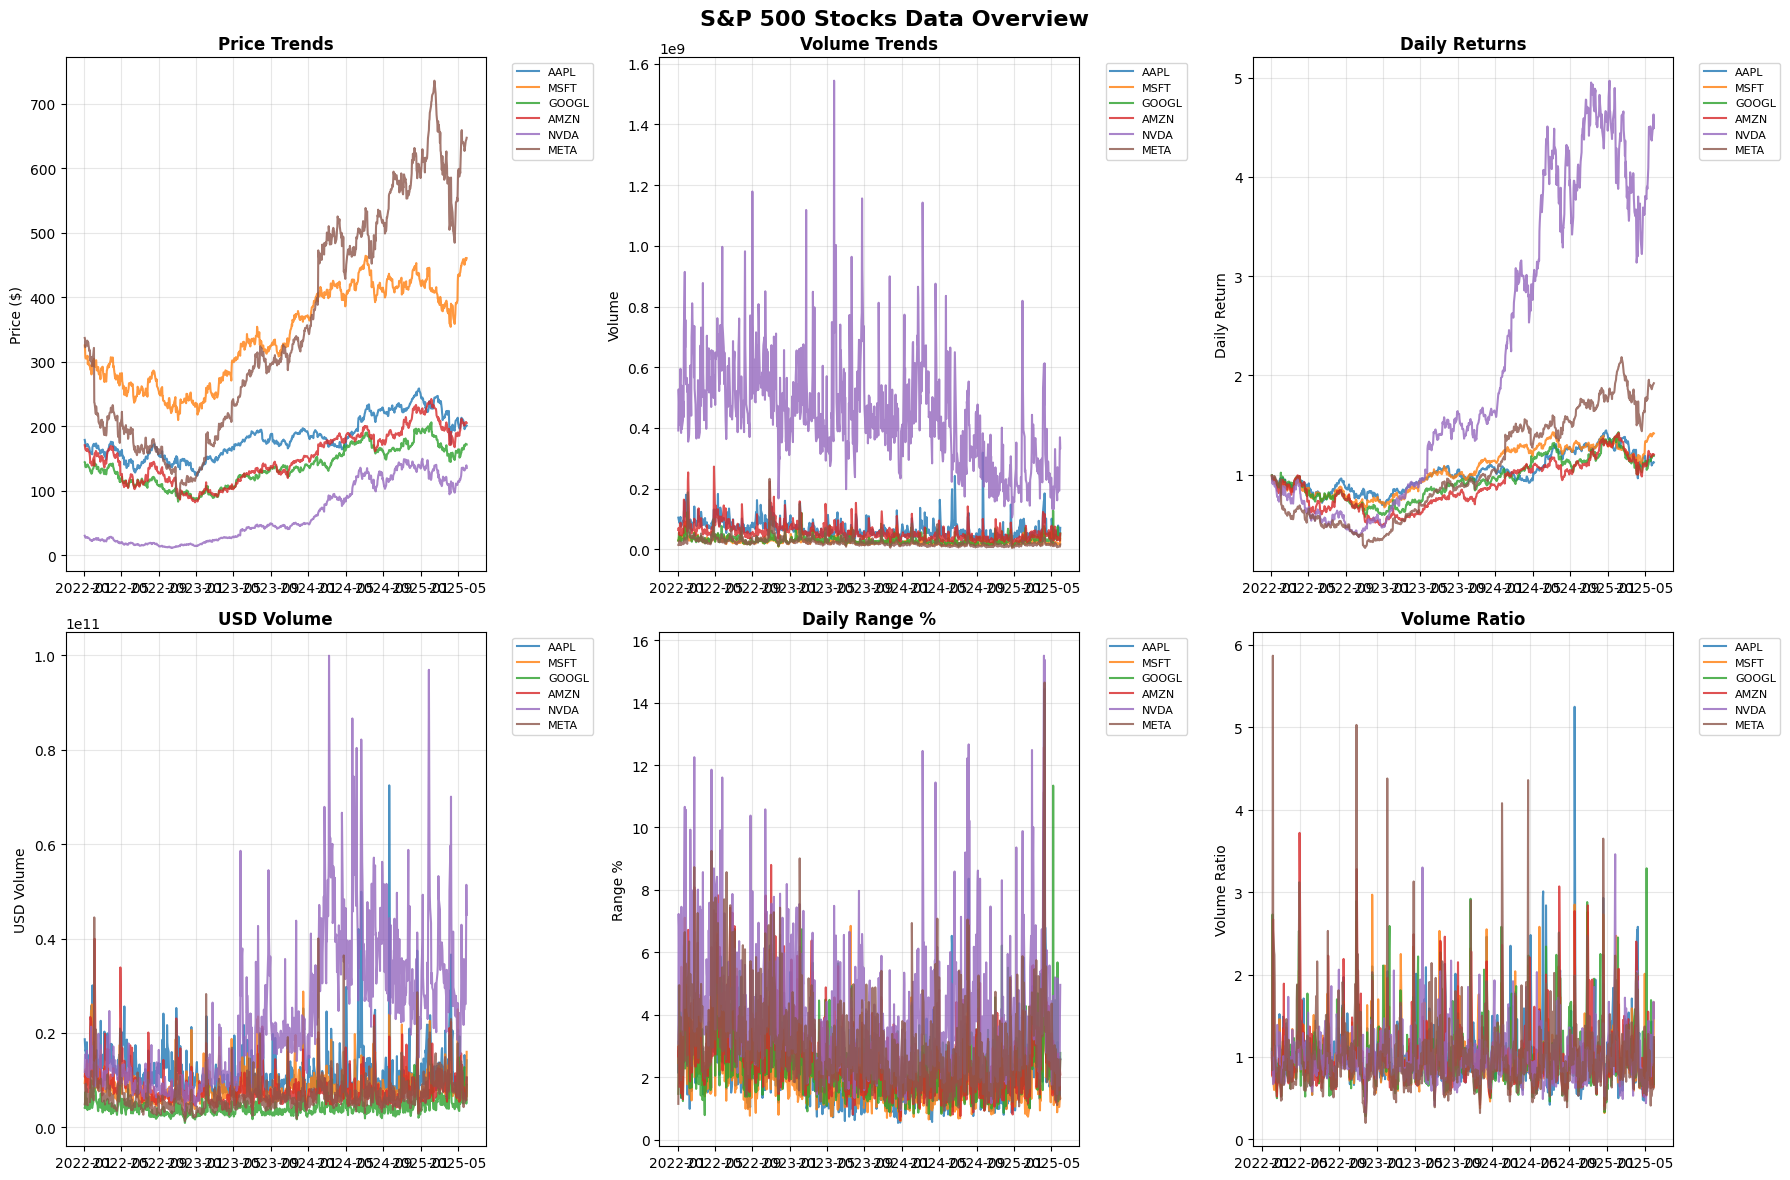

📊 SUMMARY STATISTICS:
Symbol  Records Start_Date   End_Date  Min_Price  Max_Price  Current_Price   Avg_Volume  Avg_USD_Volume  Total_Return_Pct  Daily_Volatility_Pct  Max_Daily_Gain_Pct  Max_Daily_Loss_Pct
  AAPL      855 2022-01-03 2025-05-30     123.42     258.40         200.85  66950918.01    1.179544e+10             12.43                  1.87               15.33               -9.25
  MSFT      855 2022-01-03 2025-05-30     209.39     464.00         460.36  26163714.97    8.571778e+09             41.63                  1.77               10.13               -7.72
 GOOGL      855 2022-01-03 2025-05-30      82.93     205.89         171.53  32134138.13    4.314250e+09             19.01                  2.10               10.22               -9.51
  AMZN      855 2022-01-03 2025-05-30      81.82     242.06         205.01  57058077.19    8.143771e+09             20.31                  2.43               13.54              -14.05
  NVDA      855 2022-01-03 2025-05-30      11.21     149.4

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class SNPDataProcessor:
    def __init__(self):
        self.data_cache = {}

    def get_SNP_largecap_symbols(self):
        """Top 30 S&P Large Cap stocks"""
        return [
                'AAPL', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'TSLA', 'BRK-B',
                'AVGO', 'JPM', 'LLY', 'V', 'UNH', 'XOM', 'MA', 'PG', 'JNJ', 'HD',
                'COST', 'ABBV', 'NFLX', 'CRM', 'BAC', 'KO', 'WMT', 'ADBE', 'PFE',
                'TMO', 'CSCO', 'ACN'
               ]

    def download_SNP_data(self, symbols=None, start_date="2022-01-01", end_date="2025-05-31"):
        """Download S&P stock data from Yahoo Finance"""
        if symbols is None:
            symbols = self.get_SNP_largecap_symbols()

        print(f"🔄 Downloading data for {len(symbols)} S&P stocks...")
        print(f"📅 Date range: {start_date} to {end_date}")

        downloaded_data = {}
        failed_downloads = []

        for i, symbol in enumerate(symbols):
            try:
                print(f"⬇️  Downloading {symbol} ({i+1}/{len(symbols)})...")

                ticker = yf.Ticker(symbol)
                data = ticker.history(start=start_date, end=end_date, auto_adjust=True)

                if len(data) > 100:  # Sufficient data
                    # Clean up the data
                    if data.index.tz is not None:
                        data.index = data.index.tz_convert(None)

                    downloaded_data[symbol] = data
                    print(f"✅ {symbol}: {len(data)} records")
                else:
                    failed_downloads.append(f"{symbol}: Insufficient data ({len(data)} records)")
                    print(f"❌ {symbol}: Insufficient data")

            except Exception as e:
                failed_downloads.append(f"{symbol}: {str(e)}")
                print(f"❌ {symbol}: Failed - {str(e)}")

        print(f"\n📊 Download Summary:")
        print(f"✅ Successful: {len(downloaded_data)}")
        print(f"❌ Failed: {len(failed_downloads)}")

        if failed_downloads:
            print(f"\n🚫 Failed downloads:")
            for fail in failed_downloads:
                print(f"   - {fail}")

        if len(downloaded_data) == 0:
            print("❌ No data was successfully downloaded!")
            return {}

        return self.process_pasted_data(downloaded_data)

    def process_pasted_data(self, raw_data_dict):
        """Process data from any source"""
        processed_data = {}

        print(f"\n🔧 Processing {len(raw_data_dict)} datasets...")

        for symbol, df in raw_data_dict.items():
            try:
                # Make a copy to avoid modifying original
                df = df.copy()

                # Ensure proper column names
                if 'Date' in df.columns:
                    df = df.set_index('Date')

                # Ensure index is datetime
                if not isinstance(df.index, pd.DatetimeIndex):
                    df.index = pd.to_datetime(df.index)

                # Ensure timezone-naive
                if hasattr(df.index, 'tz') and df.index.tz is not None:
                    df.index = df.index.tz_convert(None)

                # Standard column names mapping
                column_mapping = {
                    'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Close': 'Close',
                    'Volume': 'Volume', 'Adj Close': 'Close'
                }

                # Rename columns if needed
                for old_name, new_name in column_mapping.items():
                    if old_name in df.columns and new_name not in df.columns:
                        df = df.rename(columns={old_name: new_name})

                # Verify required columns exist
                required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
                missing_cols = [col for col in required_cols if col not in df.columns]

                if missing_cols:
                    print(f"❌ {symbol}: Missing columns {missing_cols}")
                    continue

                # Calculate derived metrics
                df['Symbol'] = symbol
                df['USD_Volume'] = df['Close'] * df['Volume']  # Volume in USD
                df['Price_Change'] = df['Close'].pct_change()
                df['Volume_MA_20'] = df['Volume'].rolling(20).mean()
                df['Price_MA_20'] = df['Close'].rolling(20).mean()

                # Calculate additional technical indicators
                df['Daily_Range'] = ((df['High'] - df['Low']) / df['Close'] * 100).round(2)
                df['Volume_Ratio'] = (df['Volume'] / df['Volume_MA_20']).round(2)

                # Filter for sufficient data
                if len(df) >= 100:
                    processed_data[symbol] = df
                    print(f"✅ {symbol}: {len(df)} records from {df.index.min().date()} to {df.index.max().date()}")
                else:
                    print(f"❌ {symbol}: Insufficient data ({len(df)} records)")

            except Exception as e:
                print(f"❌ {symbol}: Processing error - {str(e)}")

        self.data_cache = processed_data
        print(f"\n🎯 Successfully processed {len(processed_data)} stocks")
        return processed_data

    def inspect_data(self, symbol=None, detailed=True):
        """Inspect the processed data"""
        if len(self.data_cache) == 0:
            print("❌ No data to inspect. Please process data first.")
            return

        if symbol and symbol in self.data_cache:
            symbols_to_inspect = [symbol]
        else:
            symbols_to_inspect = list(self.data_cache.keys())[:5]  # First 5 for overview

        print(f"\n🔍 DATA INSPECTION REPORT")
        print("=" * 60)

        # Overall summary
        total_symbols = len(self.data_cache)
        date_ranges = []
        total_records = 0

        for sym, data in self.data_cache.items():
            date_ranges.append((data.index.min(), data.index.max()))
            total_records += len(data)

        overall_start = min([dr[0] for dr in date_ranges])
        overall_end = max([dr[1] for dr in date_ranges])

        print(f"📊 Total Symbols: {total_symbols}")
        print(f"📅 Date Range: {overall_start.date()} to {overall_end.date()}")
        print(f"📈 Total Records: {total_records:,}")
        print(f"📊 Average Records per Symbol: {total_records/total_symbols:.0f}")

        # Detailed inspection
        if detailed:
            print(f"\n🔍 DETAILED INSPECTION (First {len(symbols_to_inspect)} symbols):")
            print("-" * 60)

            for symbol in symbols_to_inspect:
                data = self.data_cache[symbol]
                print(f"\n📈 {symbol}:")
                print(f"   Records: {len(data):,}")
                print(f"   Date Range: {data.index.min().date()} to {data.index.max().date()}")
                print(f"   Price Range: ${data['Close'].min():.2f} - ${data['Close'].max():.2f}")
                print(f"   Avg Daily Volume: {data['Volume'].mean():,.0f}")
                print(f"   Avg Daily USD Volume: ${data['USD_Volume'].mean():,.0f}")
                print(f"   Avg Daily Return: {data['Price_Change'].mean()*100:.3f}%")
                print(f"   Daily Volatility: {data['Price_Change'].std()*100:.2f}%")

                # Check for missing data
                missing_days = data.isnull().sum().sum()
                if missing_days > 0:
                    print(f"   ⚠️  Missing data points: {missing_days}")

                # Sample data
                print(f"   Sample (Last 3 days):")
                sample = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change']].tail(3)
                for idx, row in sample.iterrows():
                    print(f"     {idx.date()}: Close=${row['Close']:.2f}, Vol={row['Volume']:,.0f}, Change={row['Price_Change']*100:.2f}%")

    def plot_data_overview(self, symbols=None, save_plot=False):
        """Create visualization of the processed data"""
        if len(self.data_cache) == 0:
            print("❌ No data to plot. Please process data first.")
            return

        if symbols is None:
            symbols = list(self.data_cache.keys())[:6]  # Plot first 6 stocks

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('S&P 500 Stocks Data Overview', fontsize=16, fontweight='bold')

        plots_data = [
            ('Price Trends', 'Close', 'Price ($)'),
            ('Volume Trends', 'Volume', 'Volume'),
            ('Daily Returns', 'Price_Change', 'Daily Return'),
            ('USD Volume', 'USD_Volume', 'USD Volume'),
            ('Daily Range %', 'Daily_Range', 'Range %'),
            ('Volume Ratio', 'Volume_Ratio', 'Volume Ratio')
        ]

        for idx, (title, column, ylabel) in enumerate(plots_data):
            row, col = idx // 3, idx % 3
            ax = axes[row, col]

            for symbol in symbols:
                if symbol in self.data_cache and column in self.data_cache[symbol].columns:
                    data = self.data_cache[symbol]
                    if column == 'Price_Change':
                        # For returns, show cumulative
                        cumulative_returns = (1 + data[column]).cumprod()
                        ax.plot(data.index, cumulative_returns, label=symbol, alpha=0.8)
                    else:
                        ax.plot(data.index, data[column], label=symbol, alpha=0.8)

            ax.set_title(title, fontweight='bold')
            ax.set_ylabel(ylabel)
            ax.grid(True, alpha=0.3)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

        plt.tight_layout()
        if save_plot:
            plt.savefig('SNP_stocks_overview.png', dpi=300, bbox_inches='tight')
            print("📁 Plot saved as 'SNP_stocks_overview.png'")
        plt.show()

    def export_summary_stats(self):
        """Export summary statistics for all processed stocks"""
        if len(self.data_cache) == 0:
            print("❌ No data to export. Please process data first.")
            return None

        summary_stats = []

        for symbol, data in self.data_cache.items():
            stats = {
                'Symbol': symbol,
                'Records': len(data),
                'Start_Date': data.index.min().date(),
                'End_Date': data.index.max().date(),
                'Min_Price': data['Close'].min(),
                'Max_Price': data['Close'].max(),
                'Current_Price': data['Close'].iloc[-1],
                'Avg_Volume': data['Volume'].mean(),
                'Avg_USD_Volume': data['USD_Volume'].mean(),
                'Total_Return_Pct': ((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100,
                'Daily_Volatility_Pct': data['Price_Change'].std() * 100,
                'Max_Daily_Gain_Pct': data['Price_Change'].max() * 100,
                'Max_Daily_Loss_Pct': data['Price_Change'].min() * 100,
            }
            summary_stats.append(stats)

        summary_df = pd.DataFrame(summary_stats)
        summary_df = summary_df.round(2)

        print("📊 SUMMARY STATISTICS:")
        print("=" * 80)
        print(summary_df.to_string(index=False))

        return summary_df

# Main function to download and inspect real S&P stock data
def download_and_inspect_SNP_data(symbols=None, start_date="2022-01-01", end_date="2025-05-31"):
    print("🇺🇸 DOWNLOADING REAL S&P 500 STOCK DATA")
    print("=" * 50)

    # Initialize processor
    processor = SNPDataProcessor()

    # Download real data
    print("🌐 Downloading fresh data from Yahoo Finance...")

    data = processor.download_SNP_data(symbols, start_date, end_date)

    if len(processor.data_cache) == 0:
        print("❌ No data was successfully downloaded. Check your internet connection or symbols.")
        return None, None

    # Inspect the data
    processor.inspect_data(detailed=True)

    # Create plots
    print("\n📈 Creating visualization plots...")
    processor.plot_data_overview()

    # Export summary
    summary = processor.export_summary_stats()

    print(f"\n✅ Successfully downloaded and processed {len(processor.data_cache)} stocks!")
    print(f"💾 Data is stored in processor.data_cache")

    return processor, summary

# Quick download function for specific stocks
def download_specific_stocks(symbols, start_date="2022-01-01", end_date="2025-05-31"):
    """Download data for specific stocks only"""

    print(f"🎯 Downloading data for {len(symbols)} specific stocks...")

    processor = SNPDataProcessor()
    data = processor.download_SNP_data(symbols, start_date, end_date)

    if len(processor.data_cache) > 0:
        processor.inspect_data(detailed=True)
        return processor, processor.data_cache
    else:
        print("❌ No data downloaded")
        return None, None

if __name__ == "__main__":
    # Download real data for all 30 large cap stocks
    processor, summary = download_and_inspect_SNP_data()

# Main Strategy

🇺🇸 STARTING REAL S&P 500 KUNAL STRATEGY ANALYSIS
📊 Using real data for 30 stocks
📅 Analysis period: 2022-02-01 to 2025-05-31
💰 Initial capital: $100,000
🇺🇸 Running S&P 500 Kunal Strategy Backtest
📅 Period: 2022-02-01 to 2025-05-31
💰 Initial Capital: $100,000
📊 Number of stocks: 30
📈 Processing 2022-02-01: Capital=$100,000
📈 Processing 2022-04-12: Capital=$93,366
📈 Processing 2022-06-21: Capital=$75,541
📈 Processing 2022-08-30: Capital=$69,305
📈 Processing 2022-11-08: Capital=$71,050
📈 Processing 2023-01-17: Capital=$77,437
📈 Processing 2023-03-28: Capital=$84,947
📈 Processing 2023-06-06: Capital=$97,500
📈 Processing 2023-08-15: Capital=$100,681
📈 Processing 2023-10-24: Capital=$92,252
📈 Processing 2024-01-02: Capital=$99,362
📈 Processing 2024-03-12: Capital=$100,224
📈 Processing 2024-05-21: Capital=$121,059
📈 Processing 2024-07-30: Capital=$156,929
📈 Processing 2024-10-08: Capital=$152,569
📈 Processing 2024-12-17: Capital=$219,090
📈 Processing 2025-02-25: Capital=$277,713
📈 Processing 

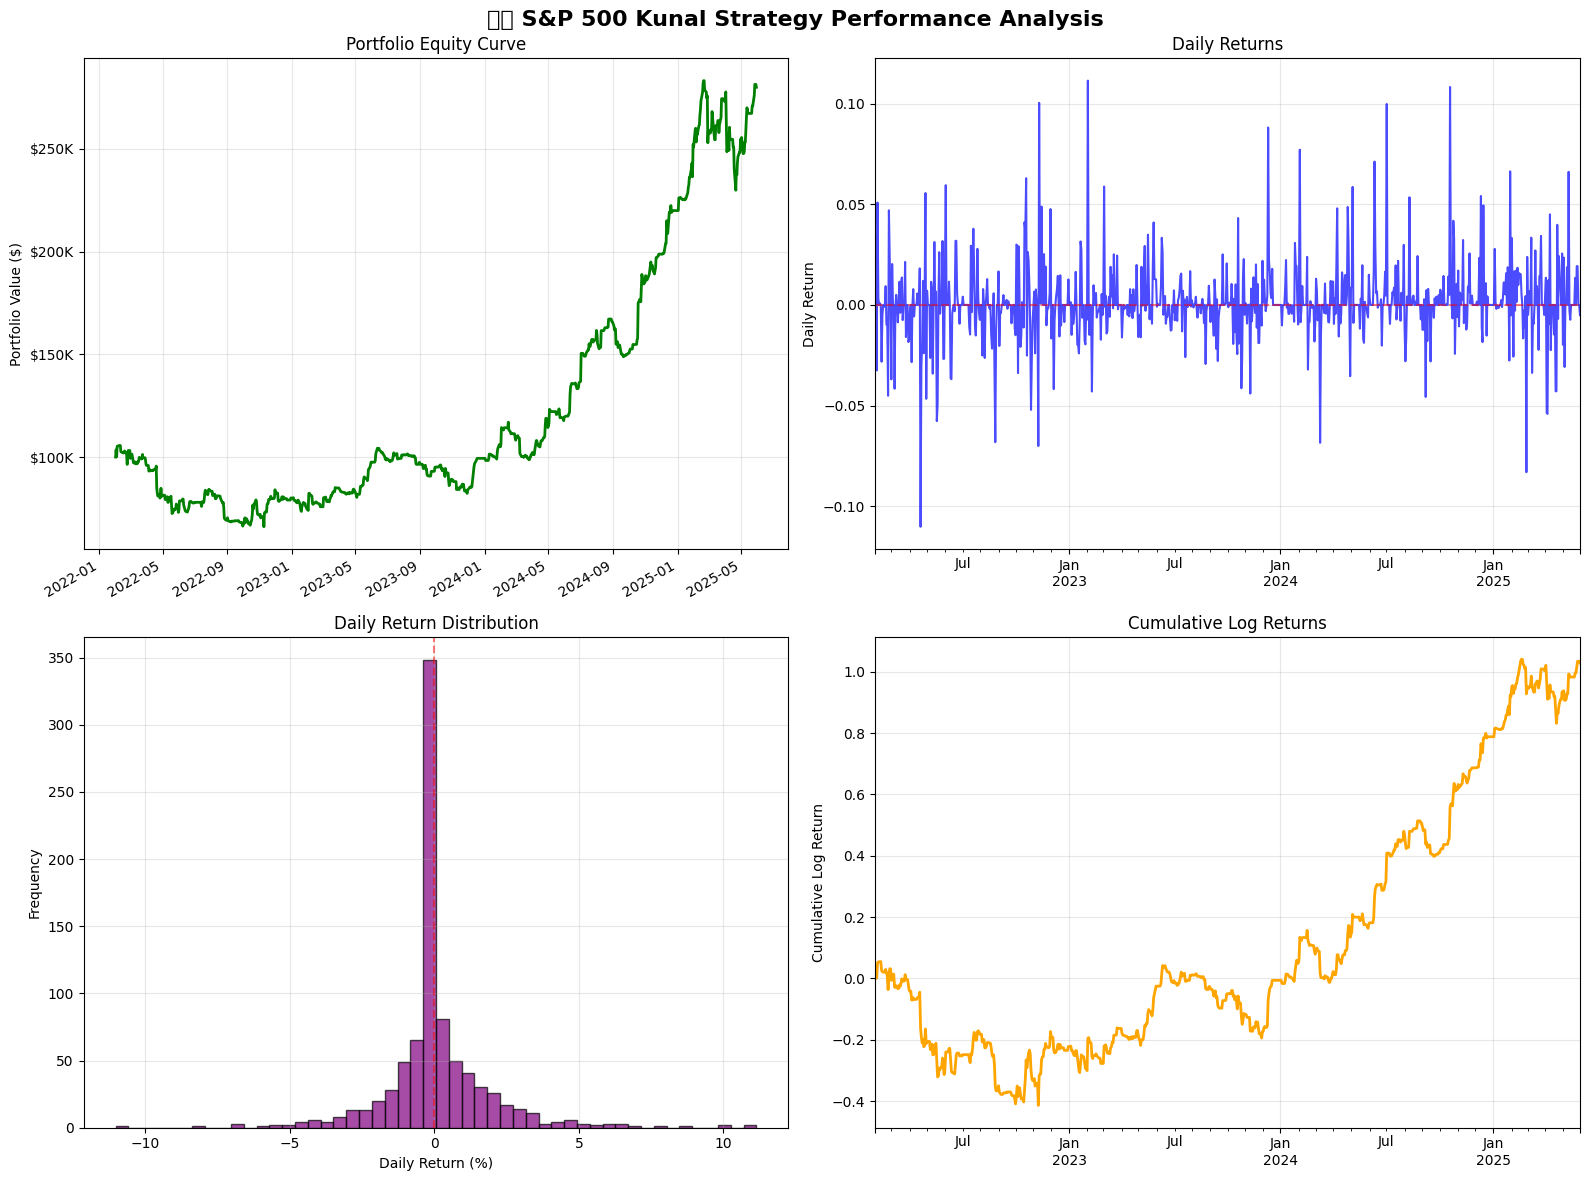


🔍 Analyzing feature effectiveness...

🔍 Analyzing 1413 S&P 500 stock trades...


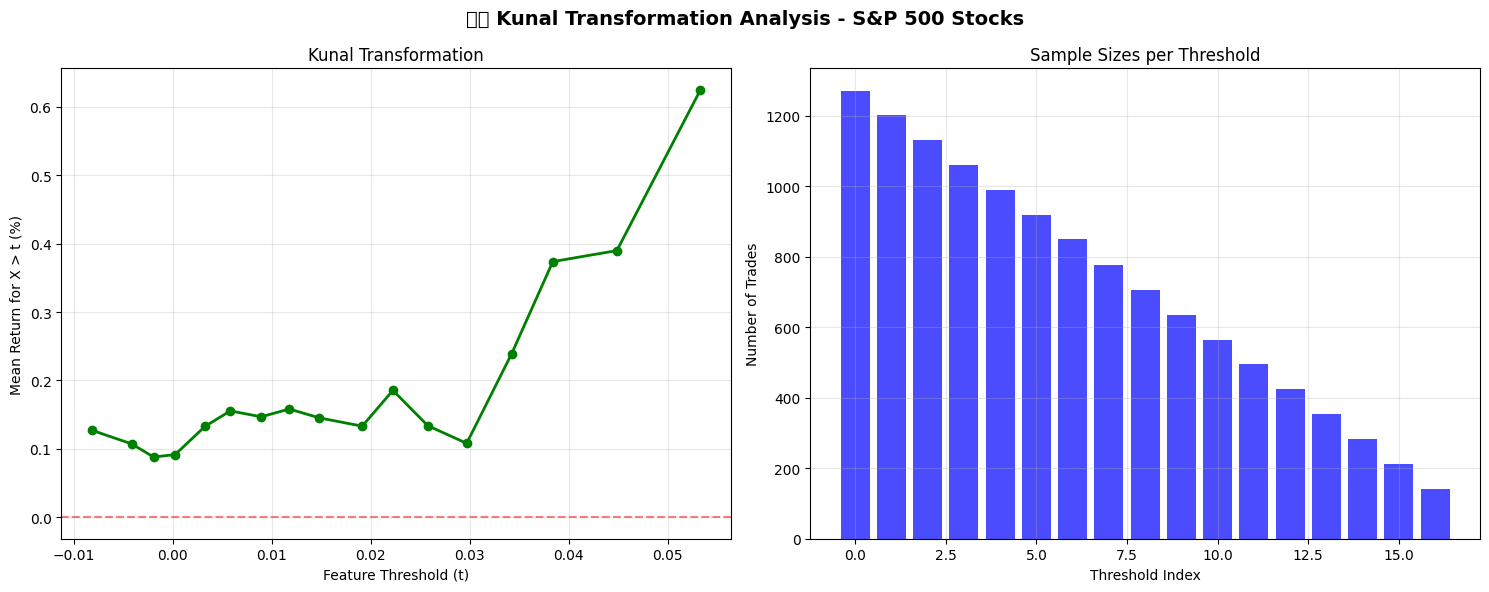


📊 S&P 500 STOCKS FEATURE ANALYSIS RESULTS:
📈 Correlation between threshold and mean returns: 0.810
✅ STRONG positive correlation - Strategy shows great promise!
🎯 The momentum composite score is highly predictive

🏆 Analyzing top performing stocks...

🏆 TOP 10 PERFORMING STOCKS:
        Avg_Return_%  Volatility_%  Trade_Count   Total_PnL
symbol                                                     
TSLA          0.0054        0.0527           51  40395.3921
NFLX          0.0043        0.0550           74  28839.4204
META          0.0060        0.0555           61  26295.3149
CRM           0.0064        0.0299           83  16514.2831
AAPL          0.0009        0.0250           44  15054.8380
AVGO          0.0023        0.0315           80  14272.8570
ABBV          0.0033        0.0157           41  13936.0515
TMO           0.0007        0.0194           54  12520.8800
PG            0.0032        0.0117           29   9975.0980
AMZN          0.0019        0.0389           50   8215.0681

In [2]:
# Final Kunal Strategy with Real Downloaded Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class SNPKunalMomentumStrategy:
    def __init__(self, min_volume_usd=5_000_000, min_price=10.0, max_positions=5):
        self.min_volume_usd = min_volume_usd  # $5M minimum volume
        self.min_price = min_price  # $10 minimum price
        self.max_positions = max_positions

    def calculate_advanced_features(self, data):
        """Calculate advanced technical features for S&P stocks"""
        if len(data) < 21:
            return None

        features = {}

        # Basic metrics
        current = data.iloc[-1]
        features['close'] = current['Close']
        features['volume'] = current['Volume']
        features['usd_volume'] = current['USD_Volume']  # Use real USD volume

        # Price momentum features
        features['return_1d'] = data['Price_Change'].iloc[-1]
        features['return_3d'] = (data['Close'].iloc[-1] / data['Close'].iloc[-4] - 1) if len(data) >= 4 else 0
        features['return_5d'] = (data['Close'].iloc[-1] / data['Close'].iloc[-6] - 1) if len(data) >= 6 else 0
        features['return_10d'] = (data['Close'].iloc[-1] / data['Close'].iloc[-11] - 1) if len(data) >= 11 else 0

        # Volatility features
        features['volatility_5d'] = data['Price_Change'].tail(5).std()
        features['volatility_10d'] = data['Price_Change'].tail(10).std()
        features['volatility_20d'] = data['Price_Change'].tail(20).std()

        # Volume features
        features['volume_ratio_5d'] = current['Volume'] / data['Volume'].tail(5).mean()
        features['volume_ratio_20d'] = current['Volume'] / data['Volume'].tail(20).mean()

        # S&P market specific features
        if len(data) >= 2:
            prev_close = data['Close'].iloc[-2]
            features['gap'] = (data['Open'].iloc[-1] / prev_close - 1)
            features['true_range'] = max(
                current['High'] - current['Low'],
                abs(current['High'] - prev_close),
                abs(current['Low'] - prev_close)
            ) / prev_close
        else:
            features['gap'] = 0
            features['true_range'] = (current['High'] - current['Low']) / current['Close']

        # Moving average features
        if len(data) >= 20:
            features['price_vs_ma20'] = current['Close'] / data['Close'].tail(20).mean() - 1
            features['volume_vs_ma20'] = current['Volume'] / data['Volume'].tail(20).mean() - 1
        else:
            features['price_vs_ma20'] = 0
            features['volume_vs_ma20'] = 0

        # RSI calculation
        features['rsi'] = self._calculate_rsi(data['Close'])

        # S&P market momentum composite score
        # Adjusted for S&P market characteristics
        features['momentum_composite'] = (
            features['return_3d'] * 0.25 +  # 3-day momentum
            features['return_5d'] * 0.15 +  # 5-day momentum
            features['volatility_5d'] * features['volume_ratio_5d'] * 0.35 +  # Vol breakout
            abs(features['gap']) * 0.15 +  # Gap significance
            features['true_range'] * 0.10   # Intraday range
        )

        return features

    def _calculate_rsi(self, prices, window=14):
        """Calculate RSI"""
        if len(prices) < window + 1:
            return 50

        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi.iloc[-1] if not pd.isna(rsi.iloc[-1]) else 50

    def apply_SNP_Kunal_filters(self, features):
        """Apply Kunal's filters adapted for S&P market"""
        if features is None:
            return False

        # Filter 1: Price minimum (avoid penny stocks)
        if features['close'] < self.min_price:
            return False

        # Filter 2: Volume minimum (liquidity requirement - $5M)
        if features['usd_volume'] < self.min_volume_usd:
            return False

        # Filter 3: Momentum condition (adapted for US market volatility)
        # US large cap stocks, so 1.5% threshold is more appropriate
        if abs(features['return_1d']) < 0.015:  # At least 1.5% daily move
            return False

        # Filter 4: Volume breakout condition
        # Higher volume relative to recent average
        if features['volume_ratio_5d'] < 1.3:  # At least 30% above average
            return False

        # Filter 5: RSI filter (avoid extremely overbought/oversold)
        if features['rsi'] > 85 or features['rsi'] < 15:
            return False

        return True

    def screen_stocks_for_date(self, data_dict, date):
        """Screen S&P stocks for a specific date"""
        selected_stocks = []

        # Ensure date is timezone-naive
        if hasattr(date, 'tz') and date.tz is not None:
            date = date.tz_convert(None).replace(tzinfo=None)

        for symbol, full_data in data_dict.items():
            # Get data up to the screening date
            historical_data = full_data[full_data.index <= date]

            if len(historical_data) < 21:
                continue

            features = self.calculate_advanced_features(historical_data)

            if self.apply_SNP_Kunal_filters(features):
                score = features['momentum_composite']
                selected_stocks.append((symbol, score, features))

        # Sort by score and take top positions
        selected_stocks.sort(key=lambda x: x[1], reverse=False)
        return selected_stocks[:self.max_positions]

class SNPHistoricalBacktester:
    def __init__(self, strategy, data_dict):
        self.strategy = strategy
        self.data_dict = data_dict
        self.results = []
        self.daily_returns = []
        self.trades = []

        # Ensure all data is timezone-naive
        for symbol in self.data_dict:
            if hasattr(self.data_dict[symbol].index, 'tz') and self.data_dict[symbol].index.tz is not None:
                self.data_dict[symbol].index = self.data_dict[symbol].index.tz_convert(None)

    def run_backtest(self, start_date="2022-02-01", end_date="2025-05-31", initial_capital=100000):
        """Run historical backtest on S&P stocks (amounts in USD)"""
        print(f"🇺🇸 Running S&P 500 Kunal Strategy Backtest")
        print(f"📅 Period: {start_date} to {end_date}")
        print(f"💰 Initial Capital: ${initial_capital:,.0f}")
        print(f"📊 Number of stocks: {len(self.data_dict)}")

        # Generate trading dates (business days only)
        trading_dates = pd.date_range(start=start_date, end=end_date, freq='B', tz=None)

        capital = initial_capital
        equity_curve = [capital]
        dates_traded = []

        for i, date in enumerate(trading_dates):
            if i % 50 == 0:
                print(f"📈 Processing {date.date()}: Capital=${capital:,.0f}")

            # Screen stocks for this date
            selected_stocks = self.strategy.screen_stocks_for_date(self.data_dict, date)

            if len(selected_stocks) == 0:
                self.daily_returns.append(0)
                equity_curve.append(capital)
                dates_traded.append(date)
                continue

            # Calculate position sizes
            position_size = capital / len(selected_stocks)
            epsilon = capital * 0.02  # 2% buffer
            safe_position_size = max(position_size - epsilon, 0)

            # Execute trades and calculate returns
            daily_pnl = 0
            day_trades = []

            for symbol, score, features in selected_stocks:
                if symbol in self.data_dict:
                    trade_result = self._execute_trade(symbol, date, safe_position_size, features, score)
                    if trade_result:
                        daily_pnl += trade_result['pnl']
                        day_trades.append(trade_result)

            # Update capital
            capital += daily_pnl
            daily_return = daily_pnl / (capital - daily_pnl) if (capital - daily_pnl) > 0 else 0

            self.daily_returns.append(daily_return)
            self.trades.extend(day_trades)
            equity_curve.append(capital)
            dates_traded.append(date)

            # Risk management
            if capital < initial_capital * 0.3:  # 70% drawdown stop
                print(f"⚠️ Risk management: Stopped at {date.date()} due to excessive losses")
                break

        # Store results
        start_date_ts = pd.Timestamp(start_date, tz=None)
        self.equity_curve = pd.Series(equity_curve, index=[start_date_ts] + dates_traded)

        return self._analyze_results(initial_capital, capital)

    def _execute_trade(self, symbol, entry_date, position_size, features, score):
        """Execute a single trade simulation"""
        try:
            stock_data = self.data_dict[symbol]

            # Find future data for exit
            future_data = stock_data[stock_data.index > entry_date]
            if len(future_data) == 0:
                return None

            entry_price = features['close']

            # Next-day exit (Kunal's <24hr holding period)
            exit_price = future_data.iloc[0]['Close']

            # Calculate trade P&L
            shares = int(position_size / entry_price)
            if shares == 0:
                return None

            actual_position_size = shares * entry_price
            pnl = shares * (exit_price - entry_price)
            return_pct = (exit_price / entry_price - 1)

            return {
                'date': entry_date,
                'symbol': symbol,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'shares': shares,
                'position_size': actual_position_size,
                'pnl': pnl,
                'return_pct': return_pct,
                'score': score
            }

        except Exception as e:
            return None

    def _analyze_results(self, initial_capital, final_capital):
        """Analyze backtest results for S&P market"""
        if len(self.daily_returns) == 0:
            return {}

        returns_series = pd.Series(self.daily_returns)

        # Key performance metrics
        total_return = (final_capital / initial_capital - 1) * 100

        # Geometric mean
        returns_plus_one = returns_series + 1
        returns_plus_one = returns_plus_one.replace([np.inf, -np.inf], 1)
        geometric_mean = np.exp(np.mean(np.log(returns_plus_one.clip(lower=0.01)))) - 1

        # Sharpe ratio (using 4.5% risk-free rate for US)
        excess_returns = returns_series - 0.045/252
        sharpe_ratio = np.mean(excess_returns) / np.std(returns_series) * np.sqrt(252) if np.std(returns_series) > 0 else 0

        # Maximum drawdown
        cumulative_returns = (1 + returns_series).cumprod()
        running_max = cumulative_returns.expanding().max()
        drawdown = (cumulative_returns - running_max) / running_max
        max_drawdown = drawdown.min() * 100

        # Other stats
        winning_days = (returns_series > 0).sum()
        total_days = len(returns_series)
        win_rate = winning_days / total_days * 100
        avg_daily_return = np.mean(returns_series) * 100

        results = {
            'total_return_pct': total_return,
            'geometric_mean_daily_pct': geometric_mean * 100,
            'annualized_return': ((final_capital / initial_capital) ** (252 / total_days) - 1) * 100,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown_pct': max_drawdown,
            'win_rate_pct': win_rate,
            'avg_daily_return_pct': avg_daily_return,
            'total_trades': len(self.trades),
            'trading_days': total_days,
            'final_capital': final_capital
        }

        self._print_results(results)
        return results

    def _print_results(self, results):
        """Print detailed backtest results"""
        print("\n" + "="*70)
        print("🇺🇸 S&P 500 KUNAL STRATEGY BACKTEST RESULTS")
        print("="*70)
        print(f"💰 Total Return: {results['total_return_pct']:.1f}%")
        print(f"📈 Annualized Return: {results['annualized_return']:.1f}%")
        print(f"📊 Geometric Mean Daily: {results['geometric_mean_daily_pct']:.3f}%")
        print(f"📉 Sharpe Ratio: {results['sharpe_ratio']:.2f}")
        print(f"⚠️  Maximum Drawdown: {results['max_drawdown_pct']:.1f}%")
        print(f"✅ Win Rate: {results['win_rate_pct']:.1f}%")
        print(f"📊 Average Daily Return: {results['avg_daily_return_pct']:.3f}%")
        print(f"🔄 Total Trades: {results['total_trades']}")
        print(f"📅 Trading Days: {results['trading_days']}")
        print(f"💵 Final Capital: ${results['final_capital']:,.0f}")
        print("="*70)

    def plot_results(self):
        """Create performance plots for S&P stocks"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🇺🇸 S&P 500 Kunal Strategy Performance Analysis', fontsize=16, fontweight='bold')

        # Equity curve
        self.equity_curve.plot(ax=ax1, title='Portfolio Equity Curve', linewidth=2, color='green')
        ax1.set_ylabel('Portfolio Value ($)')
        ax1.grid(True, alpha=0.3)
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x/1e3:.0f}K' if x < 1e6 else f'${x/1e6:.1f}M'))

        # Daily returns
        returns_series = pd.Series(self.daily_returns, index=self.equity_curve.index[1:])
        returns_series.plot(ax=ax2, title='Daily Returns', alpha=0.7, color='blue')
        ax2.set_ylabel('Daily Return')
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)

        # Return distribution
        ax3.hist(returns_series * 100, bins=50, alpha=0.7, edgecolor='black', color='purple')
        ax3.set_title('Daily Return Distribution')
        ax3.set_xlabel('Daily Return (%)')
        ax3.set_ylabel('Frequency')
        ax3.grid(True, alpha=0.3)
        ax3.axvline(x=0, color='red', linestyle='--', alpha=0.5)

        # Cumulative log returns
        log_returns = np.log(1 + returns_series.clip(lower=-0.99))
        cumulative_log_returns = log_returns.cumsum()
        cumulative_log_returns.plot(ax=ax4, title='Cumulative Log Returns', linewidth=2, color='orange')
        ax4.set_ylabel('Cumulative Log Return')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def analyze_feature_importance(self):
        """Analyze feature effectiveness for S&P stocks"""
        if len(self.trades) == 0:
            print("❌ No trades to analyze")
            return

        trades_df = pd.DataFrame(self.trades)
        print(f"\n🔍 Analyzing {len(trades_df)} S&P 500 stock trades...")

        # Kunal transformation analysis
        scores = trades_df['score'].values
        returns = trades_df['return_pct'].values

        # Create thresholds
        thresholds = np.percentile(scores, np.arange(10, 91, 5))
        mean_returns_above_threshold = []
        count_above_threshold = []

        for threshold in thresholds:
            mask = scores >= threshold
            count = mask.sum()
            if count > 5:
                mean_return = returns[mask].mean()
                mean_returns_above_threshold.append(mean_return * 100)
                count_above_threshold.append(count)
            else:
                mean_returns_above_threshold.append(np.nan)
                count_above_threshold.append(0)

        # Plot analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('🇺🇸 Kunal Transformation Analysis - S&P 500 Stocks', fontsize=14, fontweight='bold')

        valid_mask = ~np.isnan(mean_returns_above_threshold)
        if valid_mask.sum() > 0:
            ax1.plot(thresholds[valid_mask], np.array(mean_returns_above_threshold)[valid_mask],
                    'o-', linewidth=2, markersize=6, color='green')
            ax1.set_xlabel('Feature Threshold (t)')
            ax1.set_ylabel('Mean Return for X > t (%)')
            ax1.set_title('Kunal Transformation')
            ax1.grid(True, alpha=0.3)
            ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)

        ax2.bar(range(len(count_above_threshold)), count_above_threshold, alpha=0.7, color='blue')
        ax2.set_xlabel('Threshold Index')
        ax2.set_ylabel('Number of Trades')
        ax2.set_title('Sample Sizes per Threshold')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Calculate correlation
        if valid_mask.sum() > 3:
            correlation = np.corrcoef(
                thresholds[valid_mask],
                np.array(mean_returns_above_threshold)[valid_mask]
            )[0, 1]

            print(f"\n📊 S&P 500 STOCKS FEATURE ANALYSIS RESULTS:")
            print("="*60)
            print(f"📈 Correlation between threshold and mean returns: {correlation:.3f}")

            if correlation > 0.6:
                print("✅ STRONG positive correlation - Strategy shows great promise!")
                print("🎯 The momentum composite score is highly predictive")
            elif correlation > 0.3:
                print("⚠️ MODERATE positive correlation - Strategy needs refinement")
                print("🔧 Consider adjusting feature weights or filters")
            elif correlation > 0:
                print("🔍 WEAK positive correlation - More investigation needed")
                print("📝 Strategy may have limited effectiveness")
            else:
                print("❌ NO/NEGATIVE correlation - Strategy likely ineffective")
                print("🔄 Consider inverting the logic or using different features")
            print("="*60)

        return trades_df

    def get_top_performing_stocks(self, top_n=10):
        """Analyze which stocks performed best in the strategy"""
        if len(self.trades) == 0:
            print("❌ No trades to analyze")
            return

        trades_df = pd.DataFrame(self.trades)

        # Group by symbol and calculate performance
        stock_performance = trades_df.groupby('symbol').agg({
            'return_pct': ['mean', 'std', 'count'],
            'pnl': 'sum'
        }).round(4)

        stock_performance.columns = ['Avg_Return_%', 'Volatility_%', 'Trade_Count', 'Total_PnL']
        stock_performance = stock_performance.sort_values('Total_PnL', ascending=False)

        print(f"\n🏆 TOP {min(top_n, len(stock_performance))} PERFORMING STOCKS:")
        print("="*70)
        print(stock_performance.head(top_n).to_string())

        return stock_performance

# Main execution function for real S&P data
def run_real_SNP_Kunal_strategy(real_data_dict, start_date="2022-02-01", end_date="2025-05-31",
                                   initial_capital=100000):

    if not real_data_dict or len(real_data_dict) == 0:
        print("❌ No real data provided. Please download data first using the data downloader.")
        return None, None, None

    print("🇺🇸 STARTING REAL S&P 500 KUNAL STRATEGY ANALYSIS")
    print("="*70)
    print(f"📊 Using real data for {len(real_data_dict)} stocks")
    print(f"📅 Analysis period: {start_date} to {end_date}")
    print(f"💰 Initial capital: ${initial_capital:,.0f}")

    # Step 1: Initialize strategy with US market parameters
    strategy = SNPKunalMomentumStrategy(
        min_volume_usd=5_000_000,  # $5M daily volume minimum
        min_price=10.0,            # $10 minimum price
        max_positions=5            # 5 positions max
    )

    # Step 2: Run backtest on real data
    backtester = SNPHistoricalBacktester(strategy, real_data_dict)
    results = backtester.run_backtest(
        start_date=start_date,
        end_date=end_date,
        initial_capital=initial_capital
    )

    # Step 3: Analyze results
    print("\n📈 Creating performance visualizations...")
    backtester.plot_results()

    print("\n🔍 Analyzing feature effectiveness...")
    trades_analysis = backtester.analyze_feature_importance()

    print("\n🏆 Analyzing top performing stocks...")
    stock_performance = backtester.get_top_performing_stocks()

    print(f"\n✅ Analysis Complete!")
    print(f"📊 Total trades executed: {len(backtester.trades)}")
    print(f"📈 Strategy effectiveness: {'GOOD' if results.get('sharpe_ratio', 0) > 1 else 'NEEDS IMPROVEMENT'}")
    return backtester, results, trades_analysis

# Run the strategy:
backtester, results, trades = run_real_SNP_Kunal_strategy(
    real_data_dict=processor.data_cache,  # Use downloaded data
    start_date="2022-02-01",
    end_date="2025-05-31",
    initial_capital=100000  # $100K
)

# Access results:
if results:
    print(f"Strategy returned {results['total_return_pct']:.1f}% over the period")
    print(f"Sharpe ratio: {results['sharpe_ratio']:.2f}")


if __name__ == "__main__":
    print("🇺🇸 S&P 500 Kunal Strategy Ready!")

# For Indian Market

🇮🇳 DOWNLOADING REAL NIFTY STOCK DATA WITH PROPER NA HANDLING
🌐 Downloading fresh data from Yahoo Finance...
🔄 Downloading data for 30 NIFTY stocks...
📅 Date range: 2022-01-01 to 2025-05-31
⬇️  Downloading RELIANCE.NS (1/30)...
✅ RELIANCE.NS: 841 records
⬇️  Downloading HDFCBANK.NS (2/30)...
✅ HDFCBANK.NS: 841 records
⬇️  Downloading TCS.NS (3/30)...
✅ TCS.NS: 841 records
⬇️  Downloading BHARTIARTL.NS (4/30)...
✅ BHARTIARTL.NS: 841 records
⬇️  Downloading ICICIBANK.NS (5/30)...
✅ ICICIBANK.NS: 841 records
⬇️  Downloading SBIN.NS (6/30)...
✅ SBIN.NS: 841 records
⬇️  Downloading INFY.NS (7/30)...
✅ INFY.NS: 841 records
⬇️  Downloading BAJFINANCE.NS (8/30)...
✅ BAJFINANCE.NS: 841 records
⬇️  Downloading HINDUNILVR.NS (9/30)...
✅ HINDUNILVR.NS: 841 records
⬇️  Downloading ITC.NS (10/30)...
✅ ITC.NS: 841 records
⬇️  Downloading LT.NS (11/30)...
✅ LT.NS: 841 records
⬇️  Downloading KOTAKBANK.NS (12/30)...
✅ KOTAKBANK.NS: 841 records
⬇️  Downloading HCLTECH.NS (13/30)...
✅ HCLTECH.NS: 841 reco

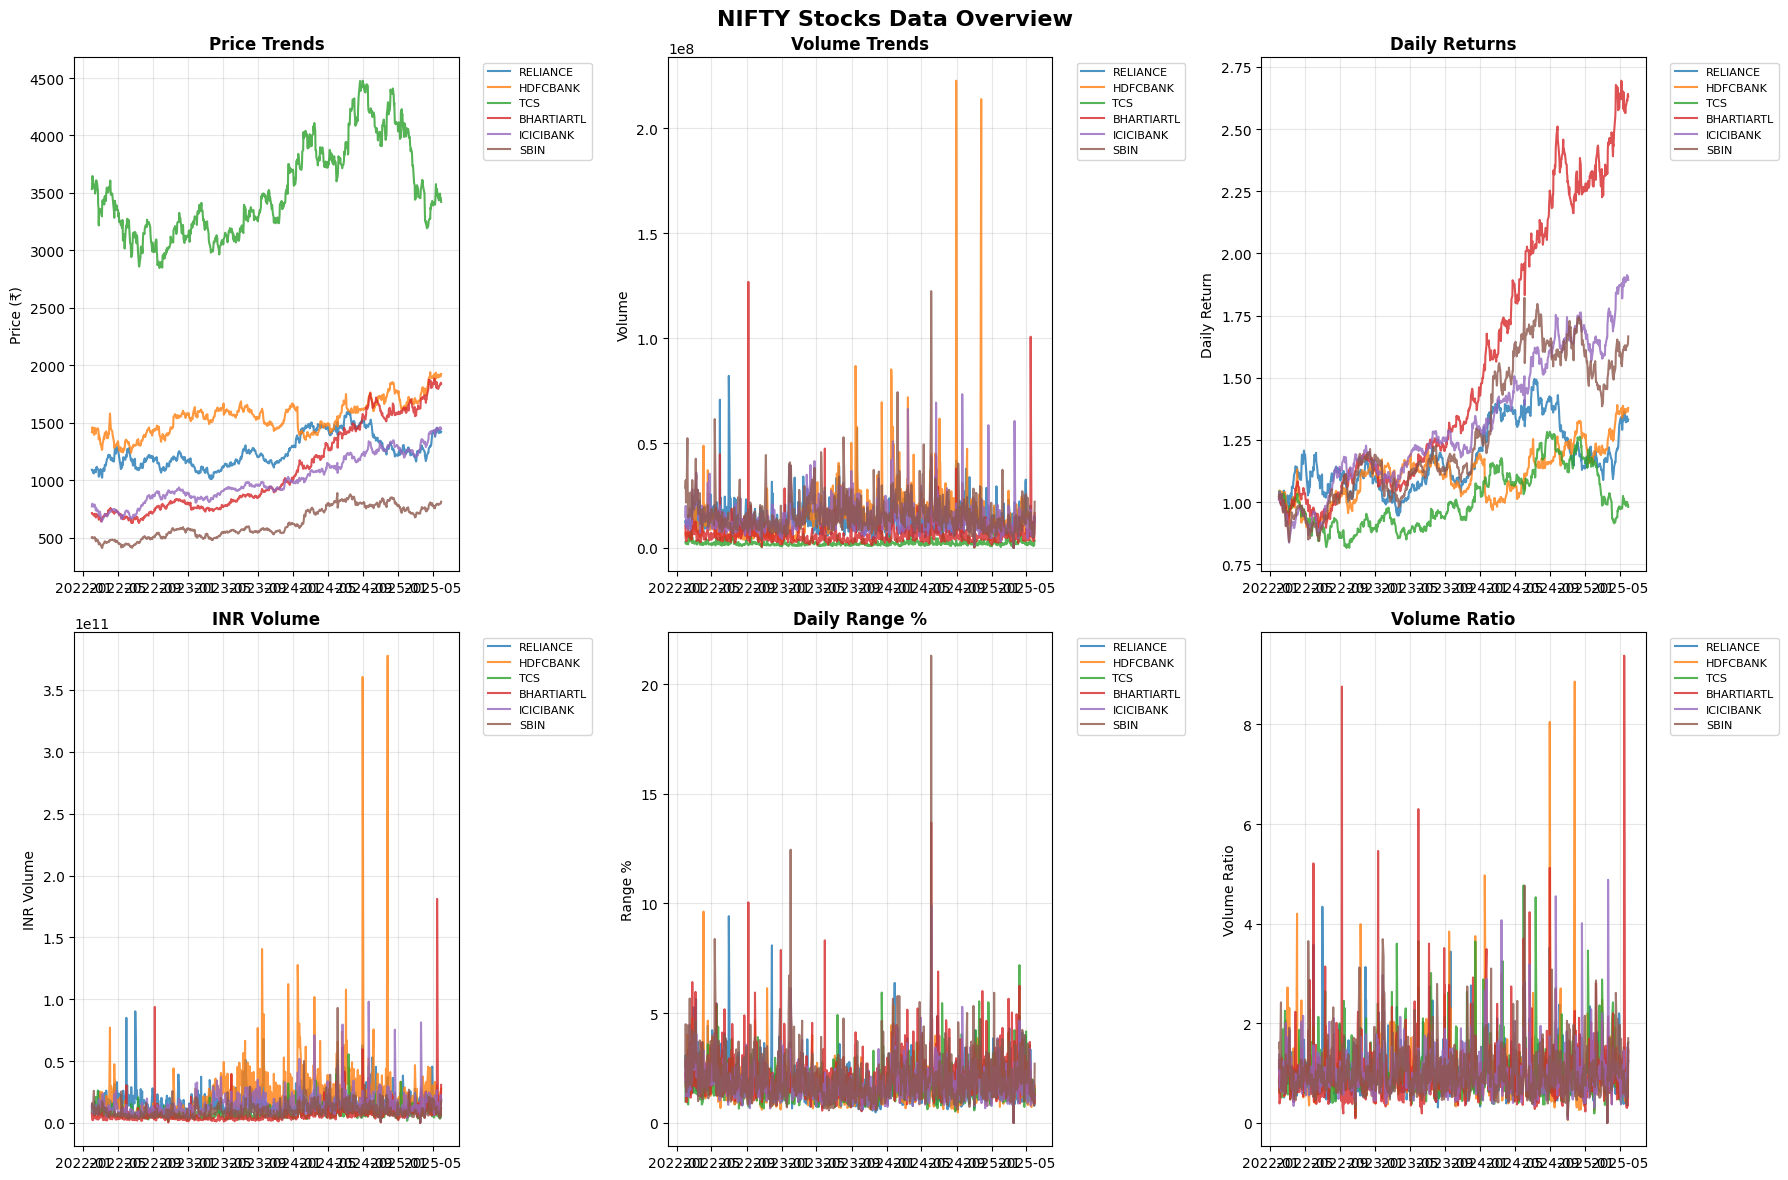

📊 SUMMARY STATISTICS:
       Symbol  Records Start_Date   End_Date  Min_Price  Max_Price  Current_Price  Avg_Volume  Avg_INR_Volume  Total_Return_Pct  Daily_Volatility_Pct  Max_Daily_Gain_Pct  Max_Daily_Loss_Pct Data_Quality
  RELIANCE.NS      822 2022-01-30 2025-05-29    1008.88    1595.48        1420.90 13392256.19    1.674685e+10             30.33                  1.43                7.02               -7.49        CLEAN
  HDFCBANK.NS      822 2022-01-30 2025-05-29    1236.11    1940.35        1923.74 14720654.20    2.298214e+10             35.78                  1.37               10.01               -8.44        CLEAN
       TCS.NS      822 2022-01-30 2025-05-29    2846.64    4476.75        3421.28  2242395.50    7.928620e+09             -3.17                  1.33                6.63               -5.42        CLEAN
BHARTIARTL.NS      822 2022-01-30 2025-05-29     626.39    1885.24        1840.81  6349951.99    6.969900e+09            158.25                  1.36                4

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class NIFTYDataProcessor:
    def __init__(self):
        self.data_cache = {}

    def get_NIFTY_largecap_symbols(self):
        """Top 30 NIFTY Large Cap stocks"""
        return [
                    'RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS', 'BHARTIARTL.NS', 'ICICIBANK.NS',
                    'SBIN.NS', 'INFY.NS', 'BAJFINANCE.NS', 'HINDUNILVR.NS', 'ITC.NS',
                    'LT.NS', 'KOTAKBANK.NS', 'HCLTECH.NS', 'SUNPHARMA.NS', 'M&M.NS',
                    'MARUTI.NS', 'ULTRACEMCO.NS', 'AXISBANK.NS', 'NTPC.NS', 'BAJAJFINSV.NS',
                    'TITAN.NS', 'ONGC.NS', 'ADANIPORTS.NS', 'EICHERMOT.NS', 'ADANIENT.NS',
                    'BRITANNIA.NS', 'POWERGRID.NS', 'HDFCLIFE.NS', 'DRREDDY.NS', 'TECHM.NS'
               ]

    def download_NIFTY_data(self, symbols=None, start_date="2022-01-01", end_date="2025-05-31"):
        """Download NIFTY stock data from Yahoo Finance"""
        if symbols is None:
            symbols = self.get_NIFTY_largecap_symbols()

        print(f"🔄 Downloading data for {len(symbols)} NIFTY stocks...")
        print(f"📅 Date range: {start_date} to {end_date}")

        downloaded_data = {}
        failed_downloads = []

        for i, symbol in enumerate(symbols):
            try:
                print(f"⬇️  Downloading {symbol} ({i+1}/{len(symbols)})...")

                ticker = yf.Ticker(symbol)
                data = ticker.history(start=start_date, end=end_date, auto_adjust=True)

                if len(data) > 100:  # Sufficient data
                    # Clean up the data
                    if data.index.tz is not None:
                        data.index = data.index.tz_convert(None)

                    downloaded_data[symbol] = data
                    print(f"✅ {symbol}: {len(data)} records")
                else:
                    failed_downloads.append(f"{symbol}: Insufficient data ({len(data)} records)")
                    print(f"❌ {symbol}: Insufficient data")

            except Exception as e:
                failed_downloads.append(f"{symbol}: {str(e)}")
                print(f"❌ {symbol}: Failed - {str(e)}")

        print(f"\n📊 Download Summary:")
        print(f"✅ Successful: {len(downloaded_data)}")
        print(f"❌ Failed: {len(failed_downloads)}")

        if failed_downloads:
            print(f"\n🚫 Failed downloads:")
            for fail in failed_downloads:
                print(f"   - {fail}")

        if len(downloaded_data) == 0:
            print("❌ No data was successfully downloaded!")
            return {}

        return self.process_pasted_data(downloaded_data)

    def process_pasted_data(self, raw_data_dict):
        """Process data from any source with proper NA handling"""
        processed_data = {}

        print(f"\n🔧 Processing {len(raw_data_dict)} datasets...")

        for symbol, df in raw_data_dict.items():
            try:
                # Make a copy to avoid modifying original
                df = df.copy()

                # Ensure proper column names
                if 'Date' in df.columns:
                    df = df.set_index('Date')

                # Ensure index is datetime
                if not isinstance(df.index, pd.DatetimeIndex):
                    df.index = pd.to_datetime(df.index)

                # Ensure timezone-naive
                if hasattr(df.index, 'tz') and df.index.tz is not None:
                    df.index = df.index.tz_convert(None)

                # Standard column names mapping
                column_mapping = {
                    'Open': 'Open', 'High': 'High', 'Low': 'Low', 'Close': 'Close',
                    'Volume': 'Volume', 'Adj Close': 'Close'
                }

                # Rename columns if needed
                for old_name, new_name in column_mapping.items():
                    if old_name in df.columns and new_name not in df.columns:
                        df = df.rename(columns={old_name: new_name})

                # Verify required columns exist
                required_cols = ['Open', 'High', 'Low', 'Close', 'Volume']
                missing_cols = [col for col in required_cols if col not in df.columns]

                if missing_cols:
                    print(f"❌ {symbol}: Missing columns {missing_cols}")
                    continue

                # Check for NA values in raw data
                initial_na_count = df[required_cols].isnull().sum().sum()
                if initial_na_count > 0:
                    print(f"⚠️  {symbol}: Found {initial_na_count} NA values in raw data")

                    # Forward fill missing OHLCV data
                    df[required_cols] = df[required_cols].fillna(method='ffill')

                    # If still NA (at beginning), backward fill
                    df[required_cols] = df[required_cols].fillna(method='bfill')

                    remaining_na = df[required_cols].isnull().sum().sum()
                    if remaining_na > 0:
                        print(f"❌ {symbol}: Still has {remaining_na} NA values after filling. Skipping.")
                        continue
                    else:
                        print(f"✅ {symbol}: Successfully filled all NA values")

                # Calculate derived metrics
                df['Symbol'] = symbol
                df['INR_Volume'] = df['Close'] * df['Volume']  # Volume in INR
                df['Price_Change'] = df['Close'].pct_change()
                df['Volume_MA_20'] = df['Volume'].rolling(20).mean()
                df['Price_MA_20'] = df['Close'].rolling(20).mean()

                # Calculate additional technical indicators
                df['Daily_Range'] = ((df['High'] - df['Low']) / df['Close'] * 100).round(2)

                # Handle division by zero for Volume_Ratio
                df['Volume_Ratio'] = np.where(
                    df['Volume_MA_20'] > 0,
                    (df['Volume'] / df['Volume_MA_20']).round(2),
                    1.0  # Default ratio when MA is 0
                )

                # Check for NA values after calculations
                calculated_na_count = df.isnull().sum().sum()
                if calculated_na_count > 0:
                    print(f"⚠️  {symbol}: Found {calculated_na_count} NA values after calculations")

                    # Drop rows with NA values (typically first few rows due to rolling averages)
                    rows_before = len(df)
                    df = df.dropna()
                    rows_after = len(df)

                    dropped_rows = rows_before - rows_after
                    if dropped_rows > 0:
                        print(f"🔧 {symbol}: Dropped {dropped_rows} rows with NA values")

                # Handle infinite values
                inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()
                if inf_count > 0:
                    print(f"⚠️  {symbol}: Found {inf_count} infinite values")
                    # Replace infinite values with NaN and then handle
                    df.replace([np.inf, -np.inf], np.nan, inplace=True)
                    df = df.dropna()
                    print(f"🔧 {symbol}: Replaced infinite values and dropped affected rows")

                # Final data quality check
                final_na_count = df.isnull().sum().sum()
                final_inf_count = np.isinf(df.select_dtypes(include=[np.number])).sum().sum()

                if final_na_count > 0 or final_inf_count > 0:
                    print(f"❌ {symbol}: Still has {final_na_count} NA and {final_inf_count} infinite values. Skipping.")
                    continue

                # Filter for sufficient data after cleaning
                if len(df) >= 100:
                    processed_data[symbol] = df
                    print(f"✅ {symbol}: {len(df)} clean records from {df.index.min().date()} to {df.index.max().date()}")
                else:
                    print(f"❌ {symbol}: Insufficient data after cleaning ({len(df)} records)")

            except Exception as e:
                print(f"❌ {symbol}: Processing error - {str(e)}")

        self.data_cache = processed_data
        print(f"\n🎯 Successfully processed {len(processed_data)} stocks with clean data")
        return processed_data

    def inspect_data(self, symbol=None, detailed=True):
        """Inspect the processed data with data quality checks"""
        if len(self.data_cache) == 0:
            print("❌ No data to inspect. Please process data first.")
            return

        if symbol and symbol in self.data_cache:
            symbols_to_inspect = [symbol]
        else:
            symbols_to_inspect = list(self.data_cache.keys())[:5]  # First 5 for overview

        print(f"\n🔍 DATA INSPECTION REPORT")
        print("=" * 60)

        # Overall summary
        total_symbols = len(self.data_cache)
        date_ranges = []
        total_records = 0

        for sym, data in self.data_cache.items():
            date_ranges.append((data.index.min(), data.index.max()))
            total_records += len(data)

        overall_start = min([dr[0] for dr in date_ranges])
        overall_end = max([dr[1] for dr in date_ranges])

        print(f"📊 Total Symbols: {total_symbols}")
        print(f"📅 Date Range: {overall_start.date()} to {overall_end.date()}")
        print(f"📈 Total Records: {total_records:,}")
        print(f"📊 Average Records per Symbol: {total_records/total_symbols:.0f}")

        # Data quality summary
        print(f"\n🔍 DATA QUALITY SUMMARY:")
        print("-" * 40)
        total_na_values = 0
        total_inf_values = 0

        for symbol, data in self.data_cache.items():
            na_count = data.isnull().sum().sum()
            inf_count = np.isinf(data.select_dtypes(include=[np.number])).sum().sum()
            total_na_values += na_count
            total_inf_values += inf_count

        print(f"✅ Total NA values across all stocks: {total_na_values}")
        print(f"✅ Total infinite values across all stocks: {total_inf_values}")
        print(f"✅ Data quality: {'EXCELLENT' if total_na_values == 0 and total_inf_values == 0 else 'NEEDS ATTENTION'}")

        # Detailed inspection
        if detailed:
            print(f"\n🔍 DETAILED INSPECTION (First {len(symbols_to_inspect)} symbols):")
            print("-" * 60)

            for symbol in symbols_to_inspect:
                data = self.data_cache[symbol]
                print(f"\n📈 {symbol}:")
                print(f"   Records: {len(data):,}")
                print(f"   Date Range: {data.index.min().date()} to {data.index.max().date()}")
                print(f"   Price Range: ₹{data['Close'].min():.2f} - ₹{data['Close'].max():.2f}")
                print(f"   Avg Daily Volume: {data['Volume'].mean():,.0f}")
                print(f"   Avg Daily INR Volume: ₹{data['INR_Volume'].mean():,.0f}")
                print(f"   Avg Daily Return: {data['Price_Change'].mean()*100:.3f}%")
                print(f"   Daily Volatility: {data['Price_Change'].std()*100:.2f}%")

                # Data quality for this symbol
                na_count = data.isnull().sum().sum()
                inf_count = np.isinf(data.select_dtypes(include=[np.number])).sum().sum()
                print(f"   ✅ NA values: {na_count}")
                print(f"   ✅ Infinite values: {inf_count}")
                print(f"   ✅ Data quality: {'CLEAN' if na_count == 0 and inf_count == 0 else 'HAS ISSUES'}")

                # Sample data
                print(f"   Sample (Last 3 days):")
                sample = data[['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change']].tail(3)
                for idx, row in sample.iterrows():
                    print(f"     {idx.date()}: Close=₹{row['Close']:.2f}, Vol={row['Volume']:,.0f}, Change={row['Price_Change']*100:.2f}%")

    def plot_data_overview(self, symbols=None, save_plot=False):
        """Create visualization of the processed data"""
        if len(self.data_cache) == 0:
            print("❌ No data to plot. Please process data first.")
            return

        if symbols is None:
            symbols = list(self.data_cache.keys())[:6]  # Plot first 6 stocks

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('NIFTY Stocks Data Overview', fontsize=16, fontweight='bold')

        plots_data = [
            ('Price Trends', 'Close', 'Price (₹)'),
            ('Volume Trends', 'Volume', 'Volume'),
            ('Daily Returns', 'Price_Change', 'Daily Return'),
            ('INR Volume', 'INR_Volume', 'INR Volume'),
            ('Daily Range %', 'Daily_Range', 'Range %'),
            ('Volume Ratio', 'Volume_Ratio', 'Volume Ratio')
        ]

        for idx, (title, column, ylabel) in enumerate(plots_data):
            row, col = idx // 3, idx % 3
            ax = axes[row, col]

            for symbol in symbols:
                if symbol in self.data_cache and column in self.data_cache[symbol].columns:
                    data = self.data_cache[symbol]
                    if column == 'Price_Change':
                        # For returns, show cumulative
                        cumulative_returns = (1 + data[column]).cumprod()
                        ax.plot(data.index, cumulative_returns, label=symbol.replace('.NS', ''), alpha=0.8)
                    else:
                        ax.plot(data.index, data[column], label=symbol.replace('.NS', ''), alpha=0.8)

            ax.set_title(title, fontweight='bold')
            ax.set_ylabel(ylabel)
            ax.grid(True, alpha=0.3)
            ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

        plt.tight_layout()
        if save_plot:
            plt.savefig('NIFTY_stocks_overview.png', dpi=300, bbox_inches='tight')
            print("📁 Plot saved as 'NIFTY_stocks_overview.png'")
        plt.show()

    def export_summary_stats(self):
        """Export summary statistics for all processed stocks"""
        if len(self.data_cache) == 0:
            print("❌ No data to export. Please process data first.")
            return None

        summary_stats = []

        for symbol, data in self.data_cache.items():
            stats = {
                'Symbol': symbol,
                'Records': len(data),
                'Start_Date': data.index.min().date(),
                'End_Date': data.index.max().date(),
                'Min_Price': data['Close'].min(),
                'Max_Price': data['Close'].max(),
                'Current_Price': data['Close'].iloc[-1],
                'Avg_Volume': data['Volume'].mean(),
                'Avg_INR_Volume': data['INR_Volume'].mean(),
                'Total_Return_Pct': ((data['Close'].iloc[-1] / data['Close'].iloc[0]) - 1) * 100,
                'Daily_Volatility_Pct': data['Price_Change'].std() * 100,
                'Max_Daily_Gain_Pct': data['Price_Change'].max() * 100,
                'Max_Daily_Loss_Pct': data['Price_Change'].min() * 100,
                'Data_Quality': 'CLEAN'  # All data is clean after processing
            }
            summary_stats.append(stats)

        summary_df = pd.DataFrame(summary_stats)
        summary_df = summary_df.round(2)

        print("📊 SUMMARY STATISTICS:")
        print("=" * 80)
        print(summary_df.to_string(index=False))

        return summary_df

# Main function to download and inspect real NIFTY stock data
def download_and_inspect_NIFTY_data(symbols=None, start_date="2022-01-01", end_date="2025-05-31"):

    print("🇮🇳 DOWNLOADING REAL NIFTY STOCK DATA WITH PROPER NA HANDLING")
    print("=" * 60)

    # Initialize processor
    processor = NIFTYDataProcessor()

    # Download real data
    print("🌐 Downloading fresh data from Yahoo Finance...")

    data = processor.download_NIFTY_data(symbols, start_date, end_date)

    if len(processor.data_cache) == 0:
        print("❌ No data was successfully downloaded. Check your internet connection or symbols.")
        return None, None

    # Inspect the data
    processor.inspect_data(detailed=True)

    # Create plots
    print("\n📈 Creating visualization plots...")
    processor.plot_data_overview()

    # Export summary
    summary = processor.export_summary_stats()

    print(f"\n✅ Successfully downloaded and processed {len(processor.data_cache)} stocks!")
    print(f"💾 Data is stored in processor.data_cache")
    print(f"🔍 All data has been cleaned and is ready for strategy backtesting")

    return processor, summary

# Quick download function for specific stocks
def download_specific_stocks(symbols, start_date="2022-01-01", end_date="2025-05-31"):
    """Download data for specific stocks only with NA handling"""

    print(f"🎯 Downloading data for {len(symbols)} specific stocks...")

    processor = NIFTYDataProcessor()
    data = processor.download_NIFTY_data(symbols, start_date, end_date)

    if len(processor.data_cache) > 0:
        processor.inspect_data(detailed=True)
        return processor, processor.data_cache
    else:
        print("❌ No data downloaded")
        return None, None

if __name__ == "__main__":
    # Download real data for all 30 large cap stocks
    processor, summary = download_and_inspect_NIFTY_data()

🇮🇳 STARTING REAL NIFTY Kunal STRATEGY ANALYSIS
📊 Using real data for 30 stocks
📅 Analysis period: 2022-02-01 to 2025-05-31
💰 Initial capital: ₹1,000,000
🇮🇳 Running NIFTY Kunal Strategy Backtest
📅 Period: 2022-02-01 to 2025-05-31
💰 Initial Capital: ₹1,000,000
📊 Number of stocks: 30
📈 Processing 2022-02-01: Capital=₹1,000,000
📈 Processing 2022-04-12: Capital=₹1,021,235
📈 Processing 2022-06-21: Capital=₹1,054,181
📈 Processing 2022-08-30: Capital=₹1,096,876
📈 Processing 2022-11-08: Capital=₹1,152,545
📈 Processing 2023-01-17: Capital=₹1,061,556
📈 Processing 2023-03-28: Capital=₹1,090,448
📈 Processing 2023-06-06: Capital=₹1,228,137
📈 Processing 2023-08-15: Capital=₹1,259,296
📈 Processing 2023-10-24: Capital=₹1,286,357
📈 Processing 2024-01-02: Capital=₹1,759,537
📈 Processing 2024-03-12: Capital=₹1,857,417
📈 Processing 2024-05-21: Capital=₹2,101,585
📈 Processing 2024-07-30: Capital=₹2,281,101
📈 Processing 2024-10-08: Capital=₹2,247,098
📈 Processing 2024-12-17: Capital=₹2,283,160
📈 Processing 2

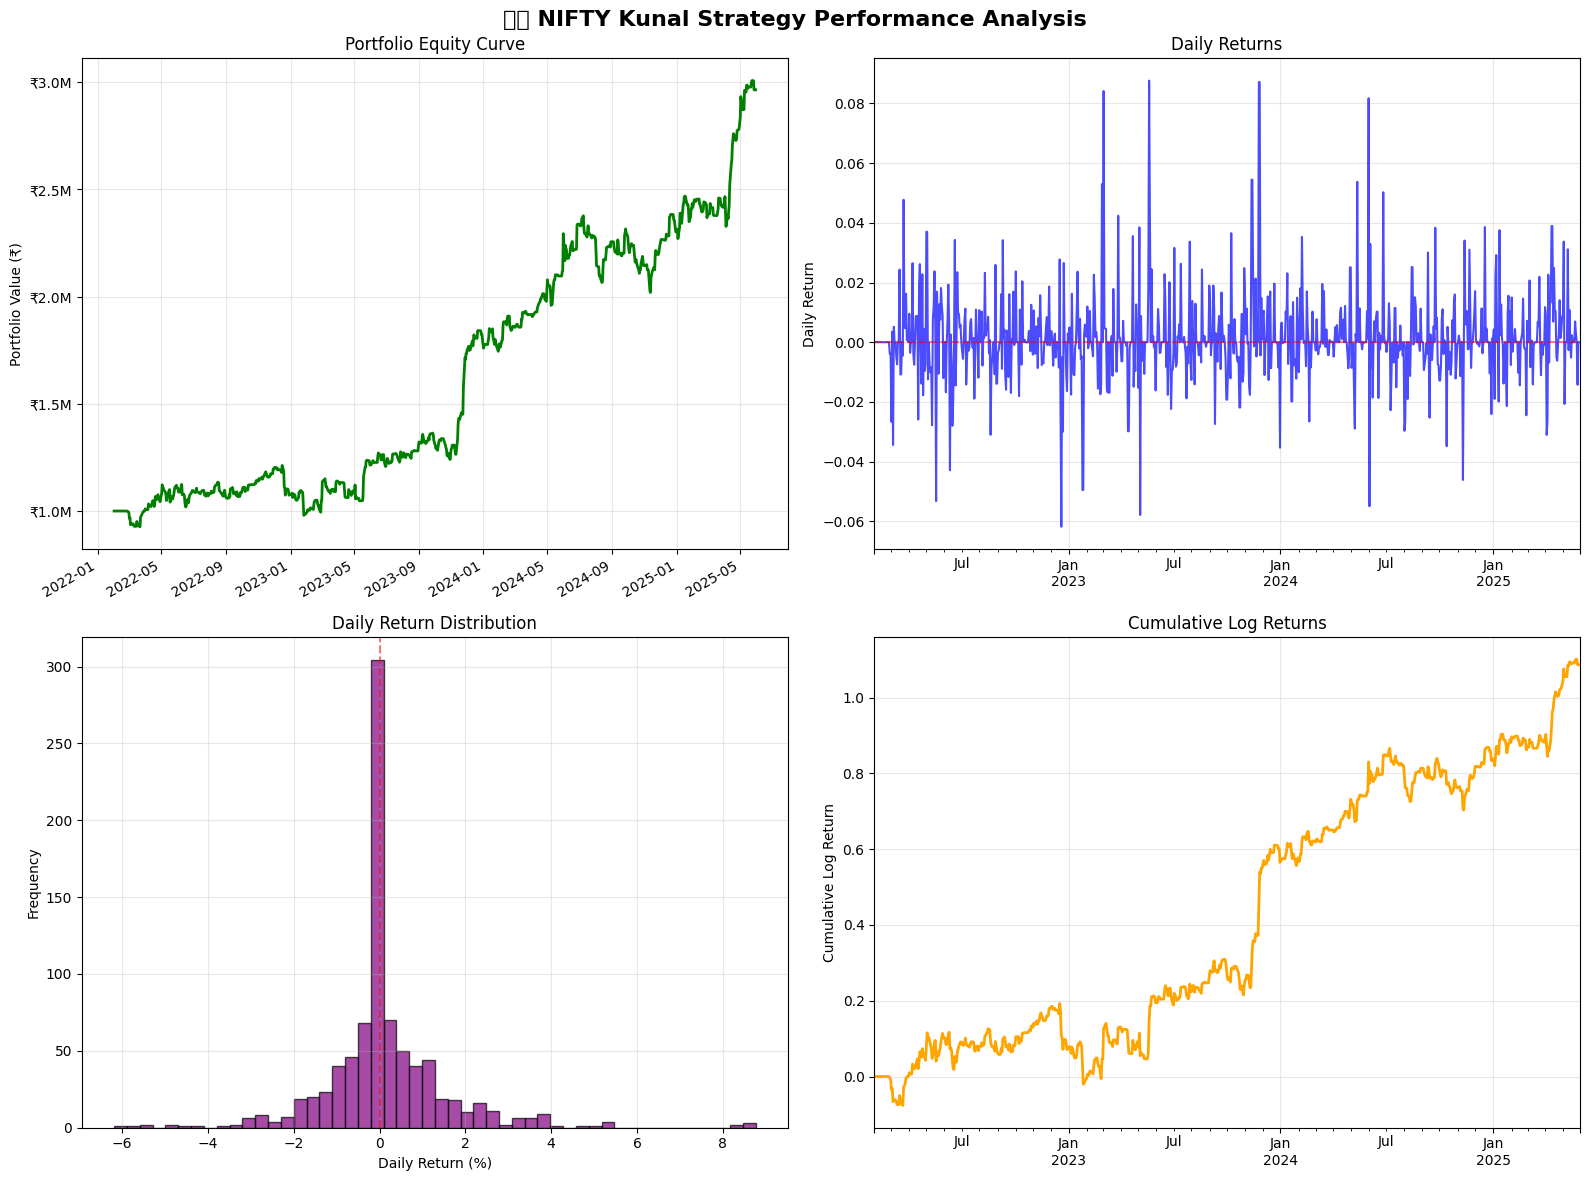


🔍 Analyzing feature effectiveness...

🔍 Analyzing 1515 NIFTY stock trades...


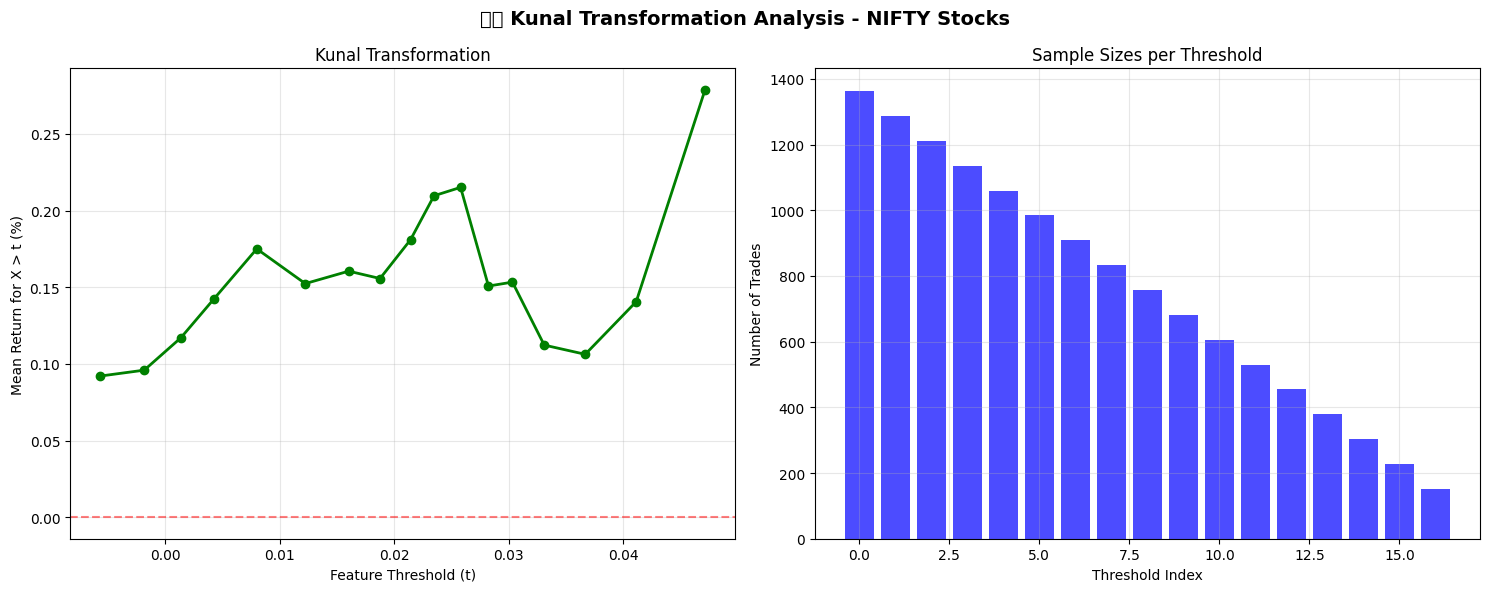


📊 SNIFTY STOCKS FEATURE ANALYSIS RESULTS:
📈 Correlation between threshold and mean returns: 0.490
⚠️ MODERATE positive correlation - Strategy needs refinement
🔧 Consider adjusting feature weights or filters

🏆 Analyzing top performing stocks...

🏆 TOP 10 PERFORMING STOCKS:
               Avg_Return_%  Volatility_%  Trade_Count    Total_PnL
symbol                                                             
ADANIENT.NS          0.0118        0.0414           93  661255.2567
ADANIPORTS.NS        0.0069        0.0247           77  536746.6512
ONGC.NS              0.0037        0.0196           69  268412.0295
BHARTIARTL.NS        0.0016        0.0144           39  171343.7236
AXISBANK.NS          0.0038        0.0111           44  142561.3866
ULTRACEMCO.NS        0.0019        0.0181           46   93690.3936
EICHERMOT.NS         0.0010        0.0217           66   86192.3357
LT.NS                0.0011        0.0192           55   74474.5499
NTPC.NS              0.0033        0.0175    

In [4]:
# Final Kunal Strategy with Real Downloaded Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

class NIFTYKunalMomentumStrategy:
    def __init__(self, min_volume_inr=50_000_000, min_price=10.0, max_positions=5):
        self.min_volume_inr = min_volume_inr  # ₹5 Crore minimum volume
        self.min_price = min_price  # ₹10 minimum price
        self.max_positions = max_positions

    def calculate_advanced_features(self, data):
        """Calculate advanced technical features for NIFTY stocks"""
        if len(data) < 21:
            return None

        features = {}

        # Basic metrics
        current = data.iloc[-1]
        features['close'] = current['Close']
        features['volume'] = current['Volume']
        features['inr_volume'] = current['INR_Volume']  # Use real INR volume

        # Price momentum features
        features['return_1d'] = data['Price_Change'].iloc[-1]
        features['return_3d'] = (data['Close'].iloc[-1] / data['Close'].iloc[-4] - 1) if len(data) >= 4 else 0
        features['return_5d'] = (data['Close'].iloc[-1] / data['Close'].iloc[-6] - 1) if len(data) >= 6 else 0
        features['return_10d'] = (data['Close'].iloc[-1] / data['Close'].iloc[-11] - 1) if len(data) >= 11 else 0

        # Volatility features
        features['volatility_5d'] = data['Price_Change'].tail(5).std()
        features['volatility_10d'] = data['Price_Change'].tail(10).std()
        features['volatility_20d'] = data['Price_Change'].tail(20).std()

        # Volume features
        features['volume_ratio_5d'] = current['Volume'] / data['Volume'].tail(5).mean()
        features['volume_ratio_20d'] = current['Volume'] / data['Volume'].tail(20).mean()

        # NIFTY market specific features
        if len(data) >= 2:
            prev_close = data['Close'].iloc[-2]
            features['gap'] = (data['Open'].iloc[-1] / prev_close - 1)
            features['true_range'] = max(
                current['High'] - current['Low'],
                abs(current['High'] - prev_close),
                abs(current['Low'] - prev_close)
            ) / prev_close
        else:
            features['gap'] = 0
            features['true_range'] = (current['High'] - current['Low']) / current['Close']

        # Moving average features
        if len(data) >= 20:
            features['price_vs_ma20'] = current['Close'] / data['Close'].tail(20).mean() - 1
            features['volume_vs_ma20'] = current['Volume'] / data['Volume'].tail(20).mean() - 1
        else:
            features['price_vs_ma20'] = 0
            features['volume_vs_ma20'] = 0

        # RSI calculation
        features['rsi'] = self._calculate_rsi(data['Close'])

        # NIFTY market momentum composite score
        # Adjusted for NIFTY market characteristics
        features['momentum_composite'] = (
            features['return_3d'] * 0.25 +  # 3-day momentum
            features['return_5d'] * 0.15 +  # 5-day momentum
            features['volatility_5d'] * features['volume_ratio_5d'] * 0.35 +  # Vol breakout
            abs(features['gap']) * 0.15 +  # Gap significance
            features['true_range'] * 0.10   # Intraday range
        )

        return features

    def _calculate_rsi(self, prices, window=14):
        """Calculate RSI"""
        if len(prices) < window + 1:
            return 50

        delta = prices.diff()
        gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
        loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()

        rs = gain / loss
        rsi = 100 - (100 / (1 + rs))
        return rsi.iloc[-1] if not pd.isna(rsi.iloc[-1]) else 50

    def apply_NIFTY_Kunal_filters(self, features):
        """Apply Kunal's filters adapted for NIFTY market"""
        if features is None:
            return False

        # Filter 1: Price minimum (avoid penny stocks)
        if features['close'] < self.min_price:
            return False

        # Filter 2: Volume minimum (liquidity requirement - ₹5 Crore)
        if features['inr_volume'] < self.min_volume_inr:
            return False

        # Filter 3: Momentum condition (adapted for NIFTY volatility)
        # NIFTY stocks can be more volatile, so 2% threshold
        if abs(features['return_1d']) < 0.02:  # At least 2% daily move
            return False

        # Filter 4: Volume breakout condition
        # Higher volume relative to recent average
        if features['volume_ratio_5d'] < 1.3:  # At least 30% above average
            return False

        # Filter 5: RSI filter (avoid extremely overbought/oversold)
        if features['rsi'] > 85 or features['rsi'] < 15:
            return False

        return True

    def screen_stocks_for_date(self, data_dict, date):
        """Screen NIFTY stocks for a specific date"""
        selected_stocks = []

        # Ensure date is timezone-naive
        if hasattr(date, 'tz') and date.tz is not None:
            date = date.tz_convert(None).replace(tzinfo=None)

        for symbol, full_data in data_dict.items():
            # Get data up to the screening date
            historical_data = full_data[full_data.index <= date]

            if len(historical_data) < 21:
                continue

            features = self.calculate_advanced_features(historical_data)

            if self.apply_NIFTY_Kunal_filters(features):
                score = features['momentum_composite']
                selected_stocks.append((symbol, score, features))

        # Sort by score and take top positions
        selected_stocks.sort(key=lambda x: x[1], reverse=False)
        return selected_stocks[:self.max_positions]

class NIFTYHistoricalBacktester:
    def __init__(self, strategy, data_dict):
        self.strategy = strategy
        self.data_dict = data_dict
        self.results = []
        self.daily_returns = []
        self.trades = []

        # Ensure all data is timezone-naive
        for symbol in self.data_dict:
            if hasattr(self.data_dict[symbol].index, 'tz') and self.data_dict[symbol].index.tz is not None:
                self.data_dict[symbol].index = self.data_dict[symbol].index.tz_convert(None)

    def run_backtest(self, start_date="2022-02-01", end_date="2025-05-31", initial_capital=1000000):
        """Run historical backtest on NIFTY stocks (amounts in INR)"""
        print(f"🇮🇳 Running NIFTY Kunal Strategy Backtest")
        print(f"📅 Period: {start_date} to {end_date}")
        print(f"💰 Initial Capital: ₹{initial_capital:,.0f}")
        print(f"📊 Number of stocks: {len(self.data_dict)}")

        # Generate trading dates (business days only)
        trading_dates = pd.date_range(start=start_date, end=end_date, freq='B', tz=None)

        capital = initial_capital
        equity_curve = [capital]
        dates_traded = []

        for i, date in enumerate(trading_dates):
            if i % 50 == 0:
                print(f"📈 Processing {date.date()}: Capital=₹{capital:,.0f}")

            # Screen stocks for this date
            selected_stocks = self.strategy.screen_stocks_for_date(self.data_dict, date)

            if len(selected_stocks) == 0:
                self.daily_returns.append(0)
                equity_curve.append(capital)
                dates_traded.append(date)
                continue

            # Calculate position sizes
            position_size = capital / len(selected_stocks)
            epsilon = capital * 0.02  # 2% buffer
            safe_position_size = max(position_size - epsilon, 0)

            # Execute trades and calculate returns
            daily_pnl = 0
            day_trades = []

            for symbol, score, features in selected_stocks:
                if symbol in self.data_dict:
                    trade_result = self._execute_trade(symbol, date, safe_position_size, features, score)
                    if trade_result:
                        daily_pnl += trade_result['pnl']
                        day_trades.append(trade_result)

            # Update capital
            capital += daily_pnl
            daily_return = daily_pnl / (capital - daily_pnl) if (capital - daily_pnl) > 0 else 0

            self.daily_returns.append(daily_return)
            self.trades.extend(day_trades)
            equity_curve.append(capital)
            dates_traded.append(date)

            # Risk management
            if capital < initial_capital * 0.3:  # 70% drawdown stop
                print(f"⚠️ Risk management: Stopped at {date.date()} due to excessive losses")
                break

        # Store results
        start_date_ts = pd.Timestamp(start_date, tz=None)
        self.equity_curve = pd.Series(equity_curve, index=[start_date_ts] + dates_traded)

        return self._analyze_results(initial_capital, capital)

    def _execute_trade(self, symbol, entry_date, position_size, features, score):
        """Execute a single trade simulation"""
        try:
            stock_data = self.data_dict[symbol]

            # Find future data for exit
            future_data = stock_data[stock_data.index > entry_date]
            if len(future_data) == 0:
                return None

            entry_price = features['close']

            # Next-day exit (Kunal's <24hr holding period)
            exit_price = future_data.iloc[0]['Close']

            # Calculate trade P&L
            shares = int(position_size / entry_price)
            if shares == 0:
                return None

            actual_position_size = shares * entry_price
            pnl = shares * (exit_price - entry_price)
            return_pct = (exit_price / entry_price - 1)

            return {
                'date': entry_date,
                'symbol': symbol,
                'entry_price': entry_price,
                'exit_price': exit_price,
                'shares': shares,
                'position_size': actual_position_size,
                'pnl': pnl,
                'return_pct': return_pct,
                'score': score
            }

        except Exception as e:
            return None

    def _analyze_results(self, initial_capital, final_capital):
        """Analyze backtest results for NIFTY market"""
        if len(self.daily_returns) == 0:
            return {}

        returns_series = pd.Series(self.daily_returns)

        # Key performance metrics
        total_return = (final_capital / initial_capital - 1) * 100

        # Geometric mean
        returns_plus_one = returns_series + 1
        returns_plus_one = returns_plus_one.replace([np.inf, -np.inf], 1)
        geometric_mean = np.exp(np.mean(np.log(returns_plus_one.clip(lower=0.01)))) - 1

        # Sharpe ratio (using 6% risk-free rate for India)
        excess_returns = returns_series - 0.06/252
        sharpe_ratio = np.mean(excess_returns) / np.std(returns_series) * np.sqrt(252) if np.std(returns_series) > 0 else 0

        # Maximum drawdown
        cumulative_returns = (1 + returns_series).cumprod()
        running_max = cumulative_returns.expanding().max()
        drawdown = (cumulative_returns - running_max) / running_max
        max_drawdown = drawdown.min() * 100

        # Other stats
        winning_days = (returns_series > 0).sum()
        total_days = len(returns_series)
        win_rate = winning_days / total_days * 100
        avg_daily_return = np.mean(returns_series) * 100

        results = {
            'total_return_pct': total_return,
            'geometric_mean_daily_pct': geometric_mean * 100,
            'annualized_return': ((final_capital / initial_capital) ** (252 / total_days) - 1) * 100,
            'sharpe_ratio': sharpe_ratio,
            'max_drawdown_pct': max_drawdown,
            'win_rate_pct': win_rate,
            'avg_daily_return_pct': avg_daily_return,
            'total_trades': len(self.trades),
            'trading_days': total_days,
            'final_capital': final_capital
        }

        self._print_results(results)
        return results

    def _print_results(self, results):
        """Print detailed backtest results"""
        print("\n" + "="*70)
        print("🇮🇳 NIFTY Kunal STRATEGY BACKTEST RESULTS")
        print("="*70)
        print(f"💰 Total Return: {results['total_return_pct']:.1f}%")
        print(f"📈 Annualized Return: {results['annualized_return']:.1f}%")
        print(f"📊 Geometric Mean Daily: {results['geometric_mean_daily_pct']:.3f}%")
        print(f"📉 Sharpe Ratio: {results['sharpe_ratio']:.2f}")
        print(f"⚠️  Maximum Drawdown: {results['max_drawdown_pct']:.1f}%")
        print(f"✅ Win Rate: {results['win_rate_pct']:.1f}%")
        print(f"📊 Average Daily Return: {results['avg_daily_return_pct']:.3f}%")
        print(f"🔄 Total Trades: {results['total_trades']}")
        print(f"📅 Trading Days: {results['trading_days']}")
        print(f"💵 Final Capital: ₹{results['final_capital']:,.0f}")
        print("="*70)

    def plot_results(self):
        """Create performance plots for NIFTY stocks"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('🇮🇳 NIFTY Kunal Strategy Performance Analysis', fontsize=16, fontweight='bold')

        # Equity curve
        self.equity_curve.plot(ax=ax1, title='Portfolio Equity Curve', linewidth=2, color='green')
        ax1.set_ylabel('Portfolio Value (₹)')
        ax1.grid(True, alpha=0.3)
        ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'₹{x/1e6:.1f}M'))

        # Daily returns
        returns_series = pd.Series(self.daily_returns, index=self.equity_curve.index[1:])
        returns_series.plot(ax=ax2, title='Daily Returns', alpha=0.7, color='blue')
        ax2.set_ylabel('Daily Return')
        ax2.grid(True, alpha=0.3)
        ax2.axhline(y=0, color='red', linestyle='--', alpha=0.5)

        # Return distribution
        ax3.hist(returns_series * 100, bins=50, alpha=0.7, edgecolor='black', color='purple')
        ax3.set_title('Daily Return Distribution')
        ax3.set_xlabel('Daily Return (%)')
        ax3.set_ylabel('Frequency')
        ax3.grid(True, alpha=0.3)
        ax3.axvline(x=0, color='red', linestyle='--', alpha=0.5)

        # Cumulative log returns
        log_returns = np.log(1 + returns_series.clip(lower=-0.99))
        cumulative_log_returns = log_returns.cumsum()
        cumulative_log_returns.plot(ax=ax4, title='Cumulative Log Returns', linewidth=2, color='orange')
        ax4.set_ylabel('Cumulative Log Return')
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def analyze_feature_importance(self):
        """Analyze feature effectiveness for NIFTY stocks"""
        if len(self.trades) == 0:
            print("❌ No trades to analyze")
            return

        trades_df = pd.DataFrame(self.trades)
        print(f"\n🔍 Analyzing {len(trades_df)} NIFTY stock trades...")

        # Kunal transformation analysis
        scores = trades_df['score'].values
        returns = trades_df['return_pct'].values

        # Create thresholds
        thresholds = np.percentile(scores, np.arange(10, 91, 5))
        mean_returns_above_threshold = []
        count_above_threshold = []

        for threshold in thresholds:
            mask = scores >= threshold
            count = mask.sum()
            if count > 5:
                mean_return = returns[mask].mean()
                mean_returns_above_threshold.append(mean_return * 100)
                count_above_threshold.append(count)
            else:
                mean_returns_above_threshold.append(np.nan)
                count_above_threshold.append(0)

        # Plot analysis
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle('🇮🇳 Kunal Transformation Analysis - NIFTY Stocks', fontsize=14, fontweight='bold')

        valid_mask = ~np.isnan(mean_returns_above_threshold)
        if valid_mask.sum() > 0:
            ax1.plot(thresholds[valid_mask], np.array(mean_returns_above_threshold)[valid_mask],
                    'o-', linewidth=2, markersize=6, color='green')
            ax1.set_xlabel('Feature Threshold (t)')
            ax1.set_ylabel('Mean Return for X > t (%)')
            ax1.set_title('Kunal Transformation')
            ax1.grid(True, alpha=0.3)
            ax1.axhline(y=0, color='red', linestyle='--', alpha=0.5)

        ax2.bar(range(len(count_above_threshold)), count_above_threshold, alpha=0.7, color='blue')
        ax2.set_xlabel('Threshold Index')
        ax2.set_ylabel('Number of Trades')
        ax2.set_title('Sample Sizes per Threshold')
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # Calculate correlation
        if valid_mask.sum() > 3:
            correlation = np.corrcoef(
                thresholds[valid_mask],
                np.array(mean_returns_above_threshold)[valid_mask]
            )[0, 1]

            print(f"\n📊 SNIFTY STOCKS FEATURE ANALYSIS RESULTS:")
            print("="*60)
            print(f"📈 Correlation between threshold and mean returns: {correlation:.3f}")

            if correlation > 0.6:
                print("✅ STRONG positive correlation - Strategy shows great promise!")
                print("🎯 The momentum composite score is highly predictive")
            elif correlation > 0.3:
                print("⚠️ MODERATE positive correlation - Strategy needs refinement")
                print("🔧 Consider adjusting feature weights or filters")
            elif correlation > 0:
                print("🔍 WEAK positive correlation - More investigation needed")
                print("📝 Strategy may have limited effectiveness")
            else:
                print("❌ NO/NEGATIVE correlation - Strategy likely ineffective")
                print("🔄 Consider inverting the logic or using different features")
            print("="*60)

        return trades_df

    def get_top_performing_stocks(self, top_n=10):
        """Analyze which stocks performed best in the strategy"""
        if len(self.trades) == 0:
            print("❌ No trades to analyze")
            return

        trades_df = pd.DataFrame(self.trades)

        # Group by symbol and calculate performance
        stock_performance = trades_df.groupby('symbol').agg({
            'return_pct': ['mean', 'std', 'count'],
            'pnl': 'sum'
        }).round(4)

        stock_performance.columns = ['Avg_Return_%', 'Volatility_%', 'Trade_Count', 'Total_PnL']
        stock_performance = stock_performance.sort_values('Total_PnL', ascending=False)

        print(f"\n🏆 TOP {min(top_n, len(stock_performance))} PERFORMING STOCKS:")
        print("="*70)
        print(stock_performance.head(top_n).to_string())

        return stock_performance

# Main execution function for real NIFTY data
def run_real_NIFTY_Kunal_strategy(real_data_dict, start_date="2022-02-01", end_date="2025-05-31",
                                   initial_capital=1000000):

    if not real_data_dict or len(real_data_dict) == 0:
        print("❌ No real data provided. Please download data first using the data downloader.")
        return None, None, None

    print("🇮🇳 STARTING REAL NIFTY Kunal STRATEGY ANALYSIS")
    print("="*70)
    print(f"📊 Using real data for {len(real_data_dict)} stocks")
    print(f"📅 Analysis period: {start_date} to {end_date}")
    print(f"💰 Initial capital: ₹{initial_capital:,.0f}")

    # Step 1: Initialize strategy with NIFTY market parameters
    strategy = NIFTYKunalMomentumStrategy(
        min_volume_inr=50_000_000,  # ₹5 Crore daily volume minimum
        min_price=10.0,             # ₹10 minimum price
        max_positions=5             # 5 positions max
    )

    # Step 2: Run backtest on real data
    backtester = NIFTYHistoricalBacktester(strategy, real_data_dict)
    results = backtester.run_backtest(
        start_date=start_date,
        end_date=end_date,
        initial_capital=initial_capital
    )

    # Step 3: Analyze results
    print("\n📈 Creating performance visualizations...")
    backtester.plot_results()

    print("\n🔍 Analyzing feature effectiveness...")
    trades_analysis = backtester.analyze_feature_importance()

    print("\n🏆 Analyzing top performing stocks...")
    stock_performance = backtester.get_top_performing_stocks()

    print(f"\n✅ Analysis Complete!")
    print(f"📊 Total trades executed: {len(backtester.trades)}")
    print(f"📈 Strategy effectiveness: {'GOOD' if results.get('sharpe_ratio', 0) > 1 else 'NEEDS IMPROVEMENT'}")
    return backtester, results, trades_analysis

# Run the strategy:
backtester, results, trades = run_real_NIFTY_Kunal_strategy(
    real_data_dict=processor.data_cache,  # Use downloaded data
    start_date="2022-02-01",
    end_date="2025-05-31",
    initial_capital=1000000  # ₹10 Lakh
)

# Access results:
if results:
    print(f"Strategy returned {results['total_return_pct']:.1f}% over the period")
    print(f"Sharpe ratio: {results['sharpe_ratio']:.2f}")


if __name__ == "__main__":
    print("🇮🇳 NIFTY Kunal Strategy Ready!")